In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, confusion_matrix,
    classification_report, ConfusionMatrixDisplay, roc_curve, auc,
    precision_recall_curve, average_precision_score
)
from sklearn.preprocessing import StandardScaler

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
)
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier

In [4]:
# Mount Google Drive for Colab
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
# Load dataset
df = pd.read_csv('/content/drive/MyDrive/student_depression_dataset.csv')
print(df.head())
print(df.columns)

   id  Gender   Age           City Profession  Academic Pressure  \
0   2    Male  33.0  Visakhapatnam    Student                5.0   
1   8  Female  24.0      Bangalore    Student                2.0   
2  26    Male  31.0       Srinagar    Student                3.0   
3  30  Female  28.0       Varanasi    Student                3.0   
4  32  Female  25.0         Jaipur    Student                4.0   

   Work Pressure  CGPA  Study Satisfaction  Job Satisfaction  \
0            0.0  8.97                 2.0               0.0   
1            0.0  5.90                 5.0               0.0   
2            0.0  7.03                 5.0               0.0   
3            0.0  5.59                 2.0               0.0   
4            0.0  8.13                 3.0               0.0   

        Sleep Duration Dietary Habits   Degree  \
0          '5-6 hours'        Healthy  B.Pharm   
1          '5-6 hours'       Moderate      BSc   
2  'Less than 5 hours'        Healthy       BA   
3     

In [6]:
df = pd.read_csv('/content/drive/MyDrive/student_depression_dataset.csv')

# Show basic information
print("---- Dataset Info ----")
print(df.info())
print("\n---- First 5 Rows ----")
print(df.head())
print("\n---- Columns ----")
print(df.columns)
print("\n---- Unique values per column ----")
for col in df.columns:
    print(f"{col}: {df[col].unique()[:10]}{'...' if df[col].nunique()>10 else ''}")

# Show shape of the dataset
print(f"\nDataset contains {df.shape[0]} rows and {df.shape[1]} columns.")

# Optional: Show summary statistics for numeric columns
print("\n---- Statistical Summary ----")
print(df.describe(include='all'))

---- Dataset Info ----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 no

In [7]:
# Step 3: Data Cleaning and Encoding (Handles all values in your dataset)

import numpy as np

# --- Gender Encoding ---
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 2})

# --- Sleep Duration Encoding ---
sleep_map = {
    'Less than 5 hours': 1,
    '5-6 hours': 2,
    '7-8 hours': 3,
    'More than 8 hours': 4,
    'Others': 5,  # treat 'Others' as missing
    "'Less than 5 hours'": 1,
    "'5-6 hours'": 2,
    "'7-8 hours'": 3,
    "'More than 8 hours'": 4,
    "'Others'": 5
}
df['Sleep Duration'] = df['Sleep Duration'].map(sleep_map)

# --- Dietary Habits Encoding ---
dietary_map = {
    'Healthy': 1,
    'Moderate': 0,
    'Unhealthy': -1,
    'Others': 2,
    "'Healthy'": 1,
    "'Moderate'": 0,
    "'Unhealthy'": -1,
    "'Others'": 2
}
df['Dietary Habits'] = df['Dietary Habits'].map(dietary_map)

# --- Suicidal Thoughts Encoding ---
df['Have you ever had suicidal thoughts ?'] = df['Have you ever had suicidal thoughts ?'].map({'Yes': 1, 'No': 0, 1: 1, 0: 0})

# --- Family History of Mental Illness Encoding ---
df['Family History of Mental Illness'] = df['Family History of Mental Illness'].map({'Yes': 1, 'No': 0, 1: 1, 0: 0})

# --- Depression Encoding (handles Yes/No and 1/0 and strings) ---
df['Depression'] = df['Depression'].replace({'Yes': 1, 'No': 0, 'yes': 1, 'no': 0}).astype(int)

# --- Profession (Optional: encode non-Student as 2, Student as 1, or use one-hot if needed) ---
# If most are 'Student', keep binary; else use pd.get_dummies(df['Profession']) if you want all
df['Profession'] = df['Profession'].apply(lambda x: 1 if str(x).lower() == "student" else 2)

# --- Degree and City (Optional: drop or encode if needed) ---
# For now, drop 'id', 'Degree', 'City' as they have too many categories and don't affect depression directly
df = df.drop(['id', 'Degree', 'City'], axis=1, errors='ignore')

# --- Check for Missing Values ---
missing = df.isnull().sum()
print("\nMissing values per column after encoding:")
print(missing)

# --- Handle missing values: Drop rows with any NaN (or use imputation if desired) ---
df = df.dropna().reset_index(drop=True)

# --- Check again ---
print("\nData shape after dropping missing values:", df.shape)
print("Any missing left?", df.isnull().sum().sum())

# --- Show each column classes/counts ---
print("\nClass distributions for each feature:")
for col in df.columns:
    print(f"{col}: {df[col].value_counts().to_dict()}")


Missing values per column after encoding:
Gender                                   0
Age                                      0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         0
Family History of Mental Illness         0
Depression                               0
dtype: int64

Data shape after dropping missing values: (27901, 15)
Any missing left? 0

Class distributions for each feature:
Gender: {1: 15547, 2: 12354}
Age: {24.0: 2258, 20.0: 2237, 28.0: 2133, 29.0: 1950, 33.0: 1893, 25.0: 1784, 21.0: 1726, 23.0: 1645, 18.0: 1587, 19.0: 1560, 34.0: 1468, 27.0: 1462, 31.0: 

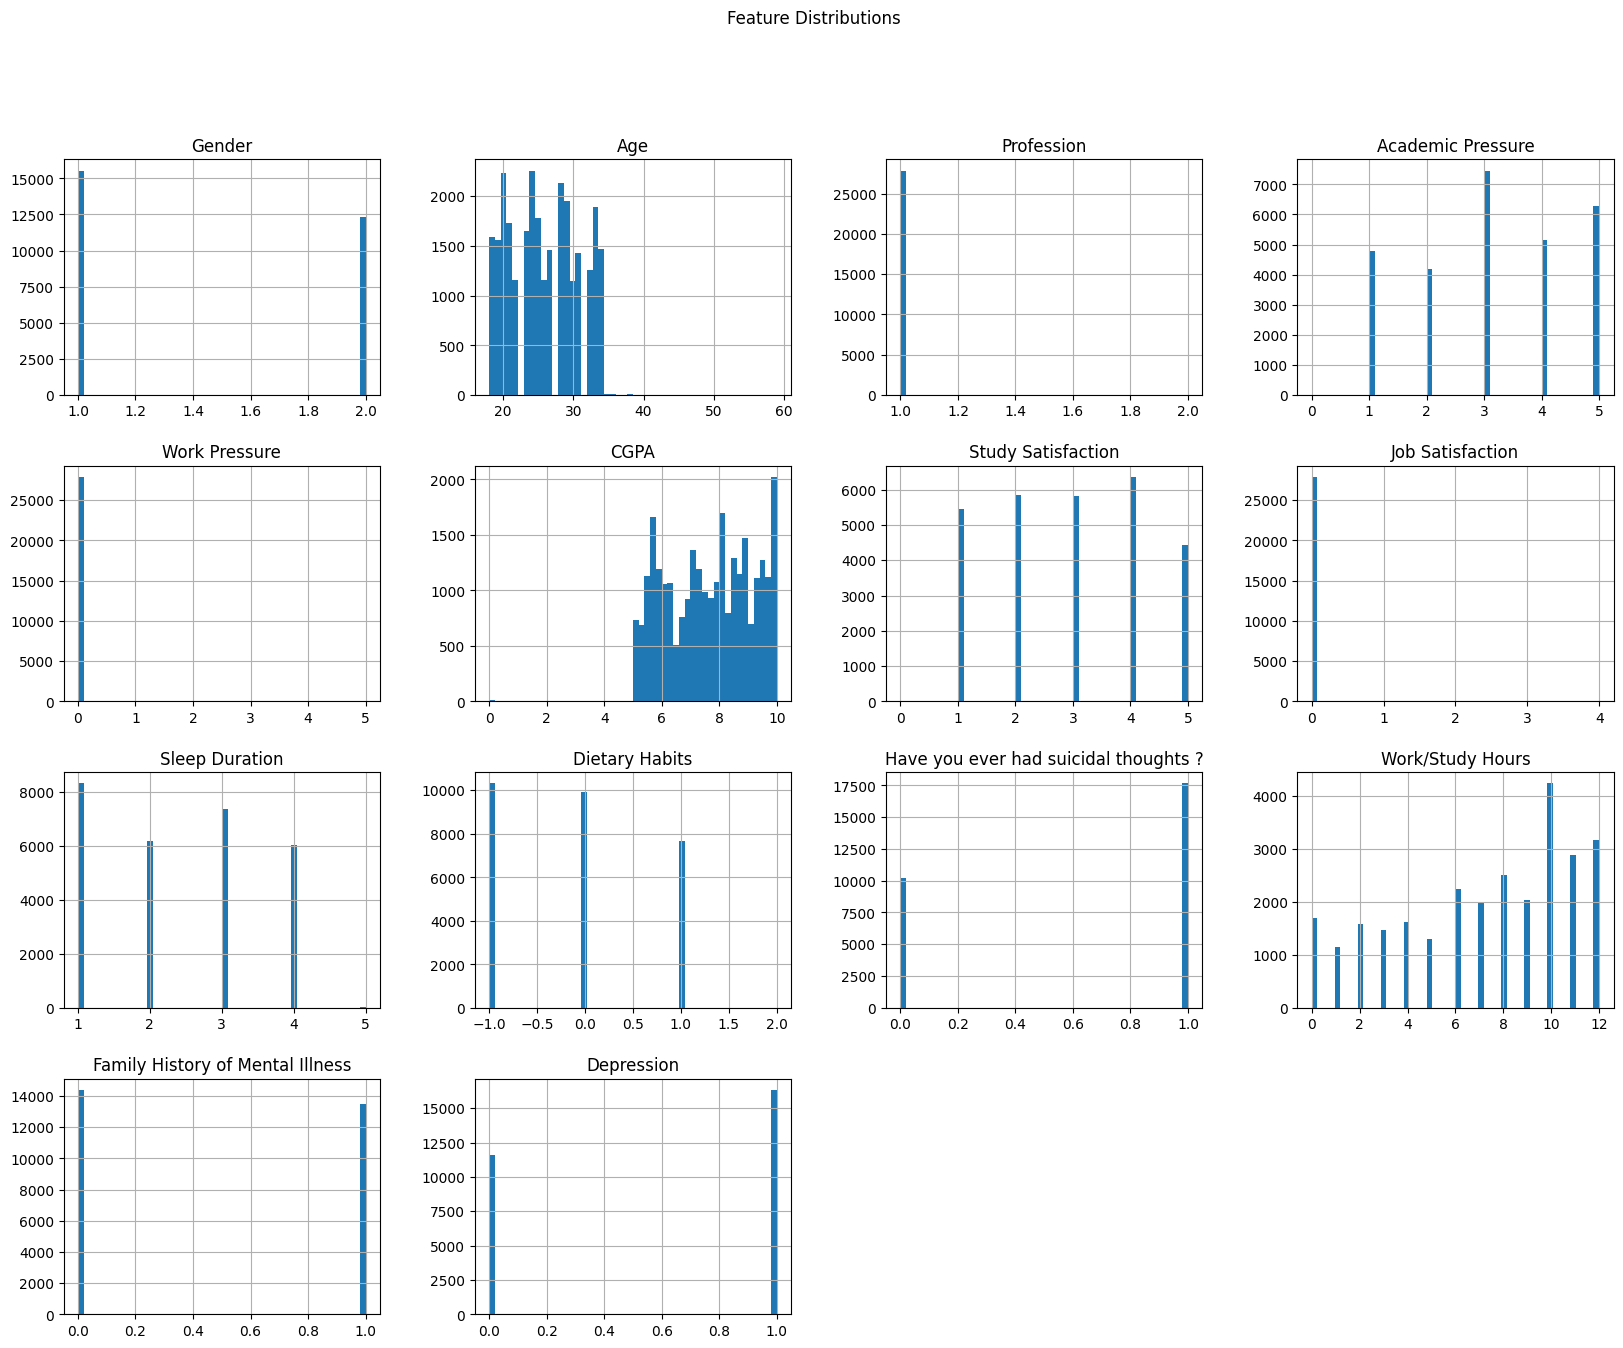

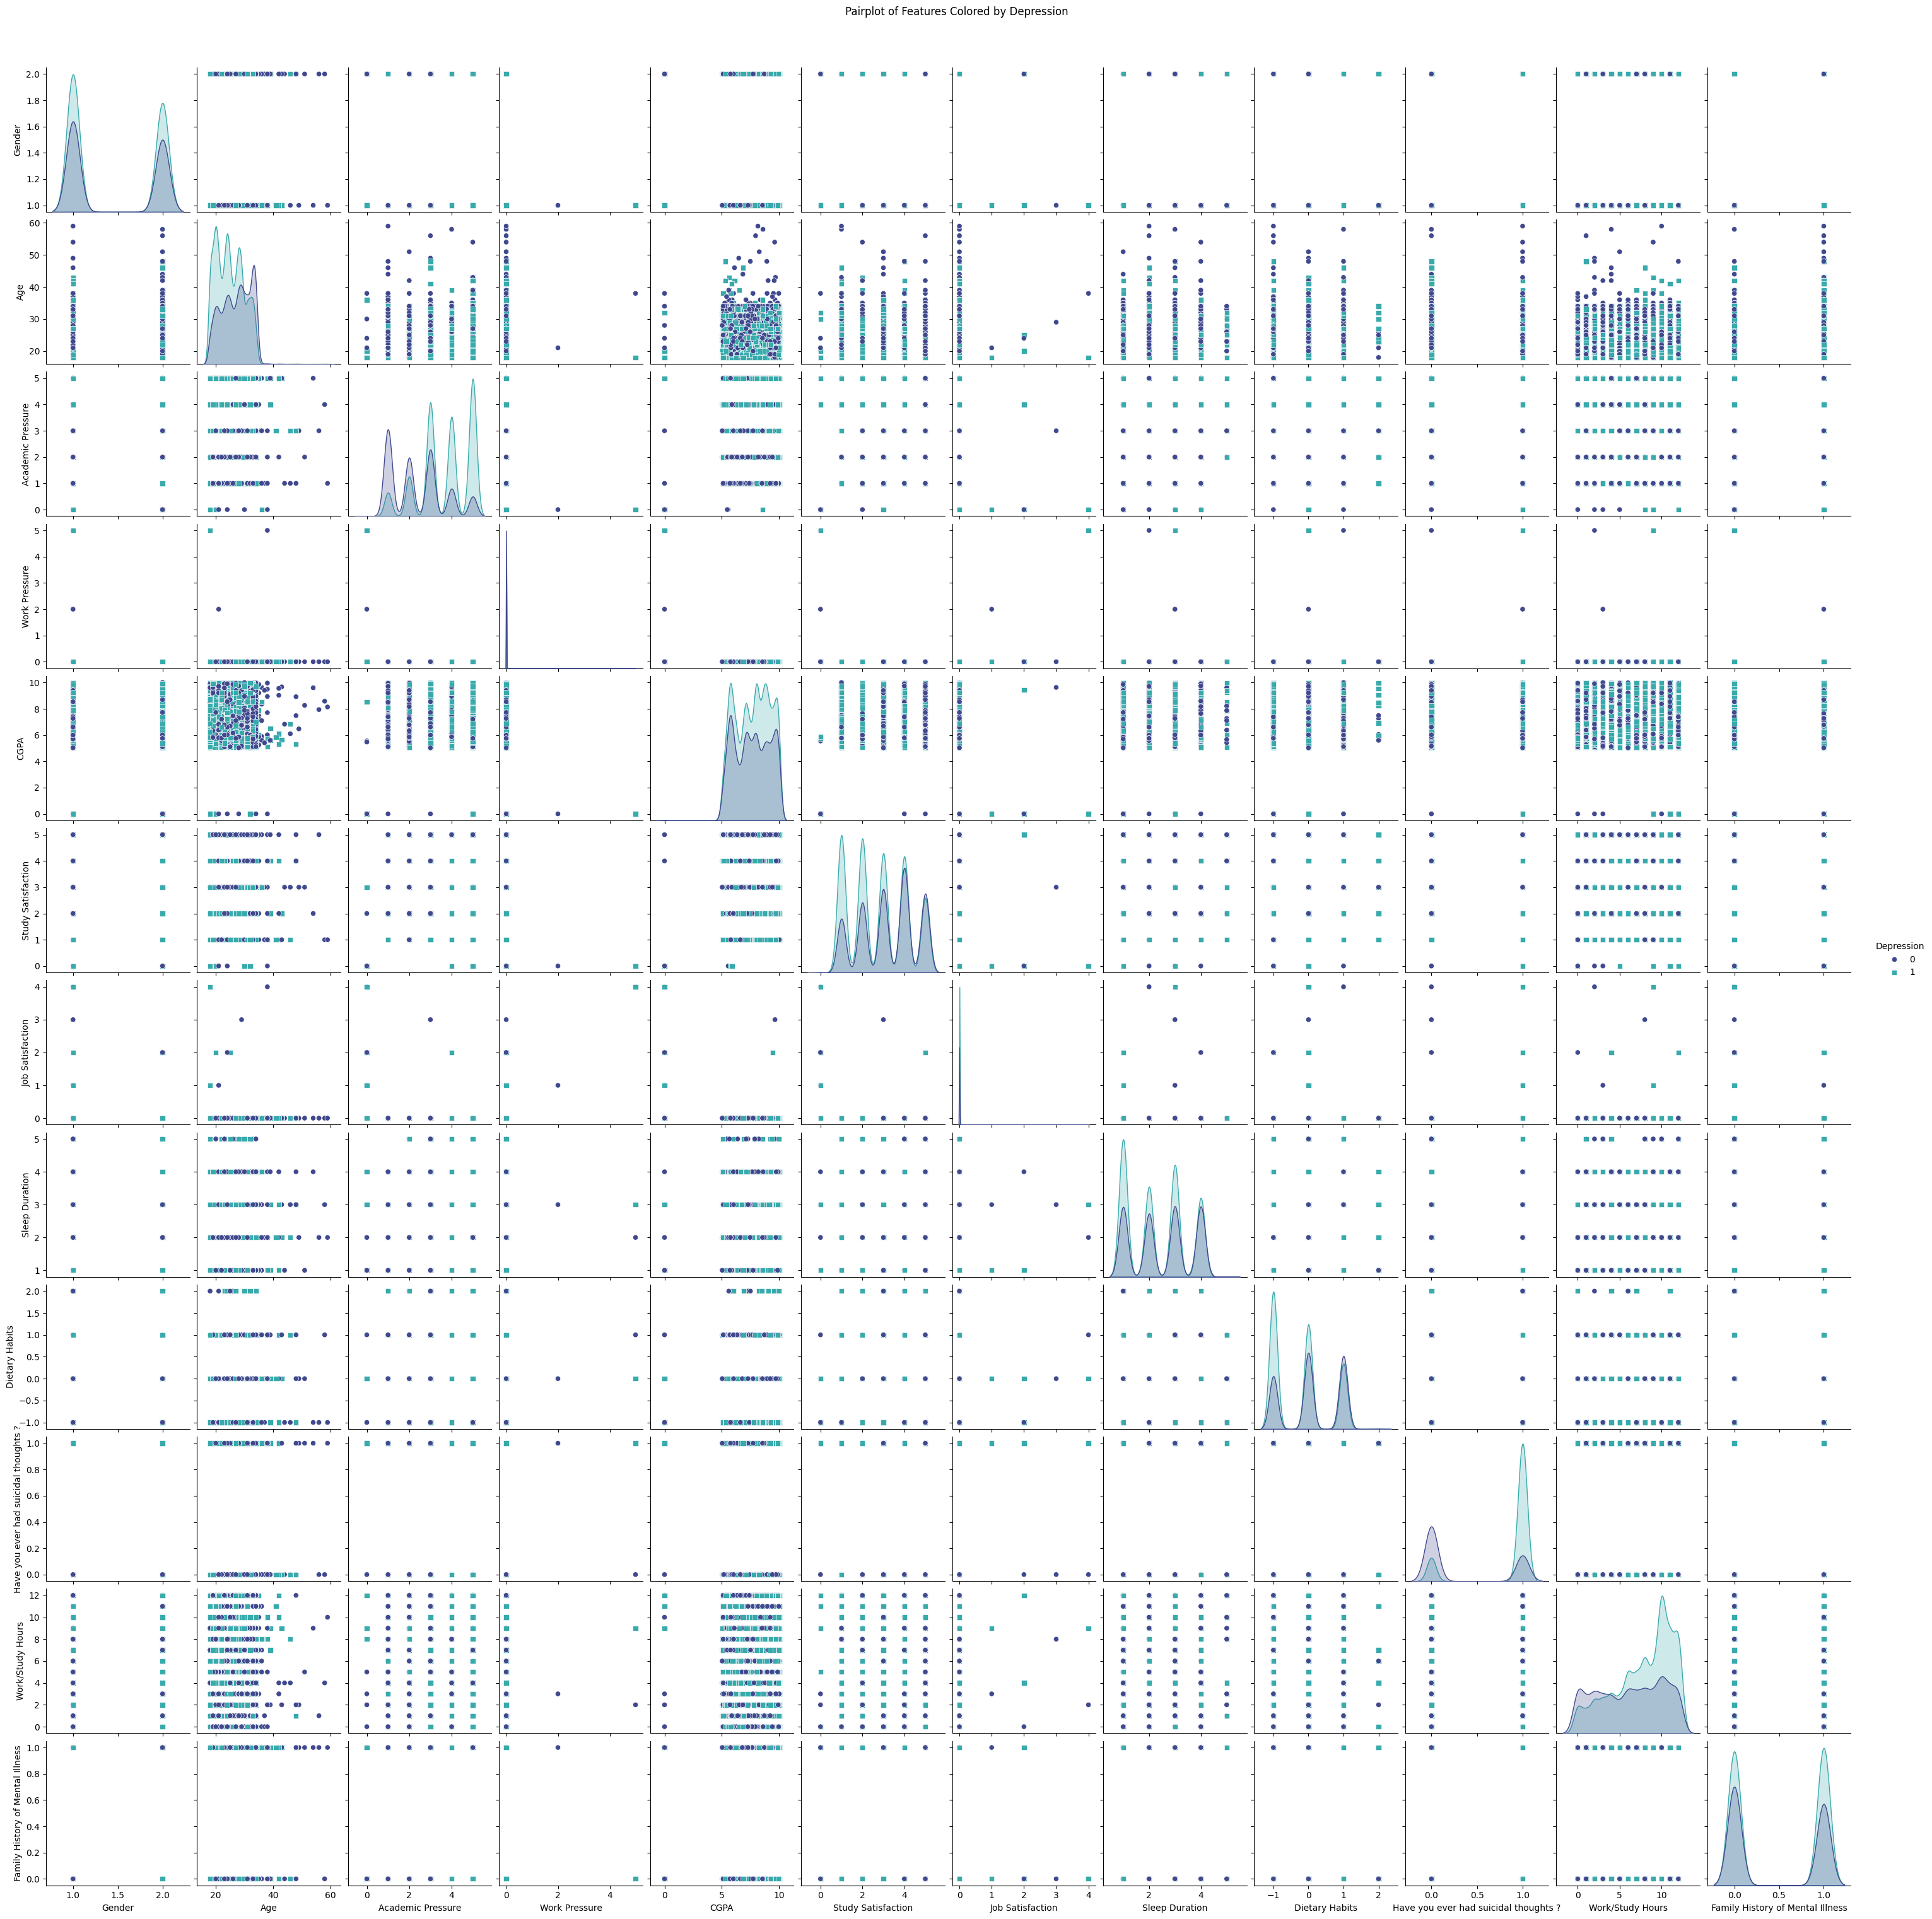

In [8]:
# Step 4: Data Visualization and Exploratory Data Analysis (EDA)

import matplotlib.pyplot as plt
import seaborn as sns

# --- Plot histograms for all columns (to check balance and distribution) ---
df.hist(bins=50, figsize=(20, 15))
plt.suptitle("Feature Distributions")
plt.show()

# --- Pairplot to visualize feature correlations with Depression ---
# Warning: Pairplot can be very heavy if many features are included.
# To avoid performance issues, we select only a subset of relevant/numeric columns.

# Select numeric and important categorical columns for pairplot
pairplot_cols = [
    'Gender', 'Age', 'Academic Pressure', 'Work Pressure', 'CGPA',
    'Study Satisfaction', 'Job Satisfaction', 'Sleep Duration',
    'Dietary Habits', 'Have you ever had suicidal thoughts ?',
    'Work/Study Hours', 'Financial Stress', 'Family History of Mental Illness', 'Depression'
]

# Ensure only columns present in df
pairplot_cols = [col for col in pairplot_cols if col in df.columns]

sns.pairplot(df[pairplot_cols], hue="Depression", diag_kind="kde", palette="mako", markers=["o", "s"])
plt.suptitle("Pairplot of Features Colored by Depression", y=1.02)
plt.show()

In [9]:
# Step 5: Splitting Dataset into Train, Test, and Validation sets

from sklearn.model_selection import train_test_split

# Separate features and target
X = df.drop(['Depression'], axis=1)
y = df['Depression']

# Split into train, temp (which will be further split into test and validation)
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Split temp into test and validation (each gets half of temp, so 0.15 of total each)
X_test, X_valid, y_test, y_valid = train_test_split(
    X_temp, y_temp, test_size=1/3, random_state=42, stratify=y_temp
)

# Show the shape of each split
print(f"Train set: {X_train.shape}, {y_train.shape}")
print(f"Test set: {X_test.shape}, {y_test.shape}")
print(f"Validation set: {X_valid.shape}, {y_valid.shape}")

Train set: (19530, 14), (19530,)
Test set: (5580, 14), (5580,)
Validation set: (2791, 14), (2791,)


In [10]:
# prompt: apply chi squre and after applying only print the significant attribute

import pandas as pd
from scipy.stats import chi2_contingency

# Assuming 'df' is your DataFrame and 'Depression' is your target variable

# Iterate through columns (excluding the target variable)
for column in df.columns:
    if column != 'Depression':
        contingency_table = pd.crosstab(df[column], df['Depression'])
        chi2, p, dof, expected = chi2_contingency(contingency_table)
        if p < 0.05:  # Significance level of 0.05
            print(f"Significant attribute: {column}, p-value: {p}")

Significant attribute: Age, p-value: 0.0
Significant attribute: Profession, p-value: 0.0006483117660975273
Significant attribute: Academic Pressure, p-value: 0.0
Significant attribute: CGPA, p-value: 3.25374563748699e-11
Significant attribute: Study Satisfaction, p-value: 2.4483608651299193e-169
Significant attribute: Sleep Duration, p-value: 1.065310789284643e-58
Significant attribute: Dietary Habits, p-value: 1.9624854819352487e-260
Significant attribute: Have you ever had suicidal thoughts ?, p-value: 0.0
Significant attribute: Work/Study Hours, p-value: 1.5593342132128365e-268
Significant attribute: Financial Stress, p-value: 0.0
Significant attribute: Family History of Mental Illness, p-value: 4.9849805086059e-19


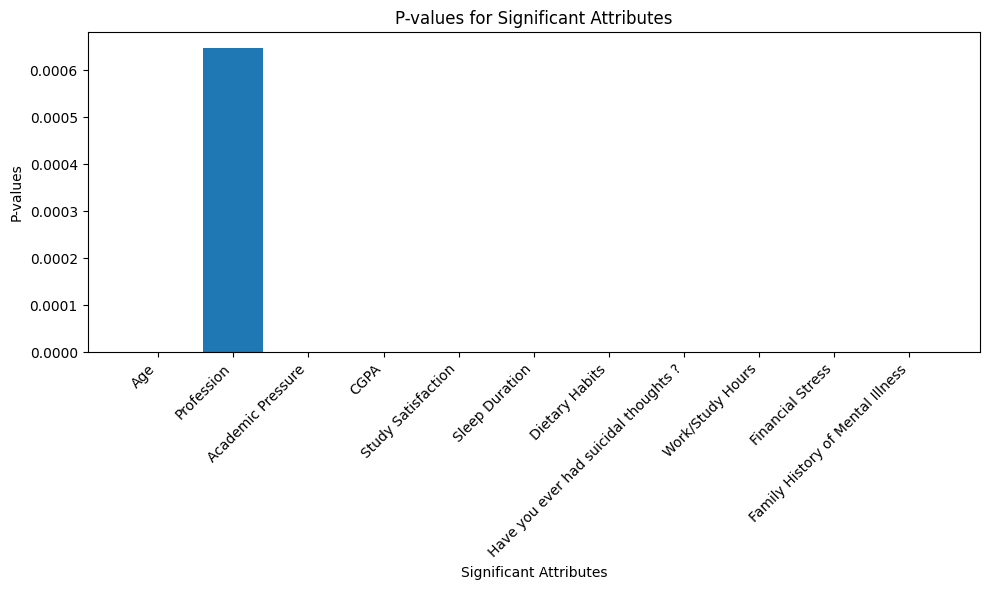

In [11]:
# prompt: save the figure in pdf

import pandas as pd
import matplotlib.pyplot as plt
# Assuming 'df' is your DataFrame and 'Depression' is your target variable

significant_attributes = []
p_values = []

for column in df.columns:
    if column != 'Depression':
        contingency_table = pd.crosstab(df[column], df['Depression'])
        chi2, p, dof, expected = chi2_contingency(contingency_table)
        if p < 0.05:  # Significance level of 0.05
            significant_attributes.append(column)
            p_values.append(p)

# Create the plot
plt.figure(figsize=(10, 6))
plt.bar(significant_attributes, p_values)
plt.xlabel("Significant Attributes")
plt.ylabel("P-values")
plt.title("P-values for Significant Attributes")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()

# Save the plot as a PDF
plt.savefig("significant_attributes.pdf")
plt.show()


/tmp/ipython-input-67-63871281.py:55: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


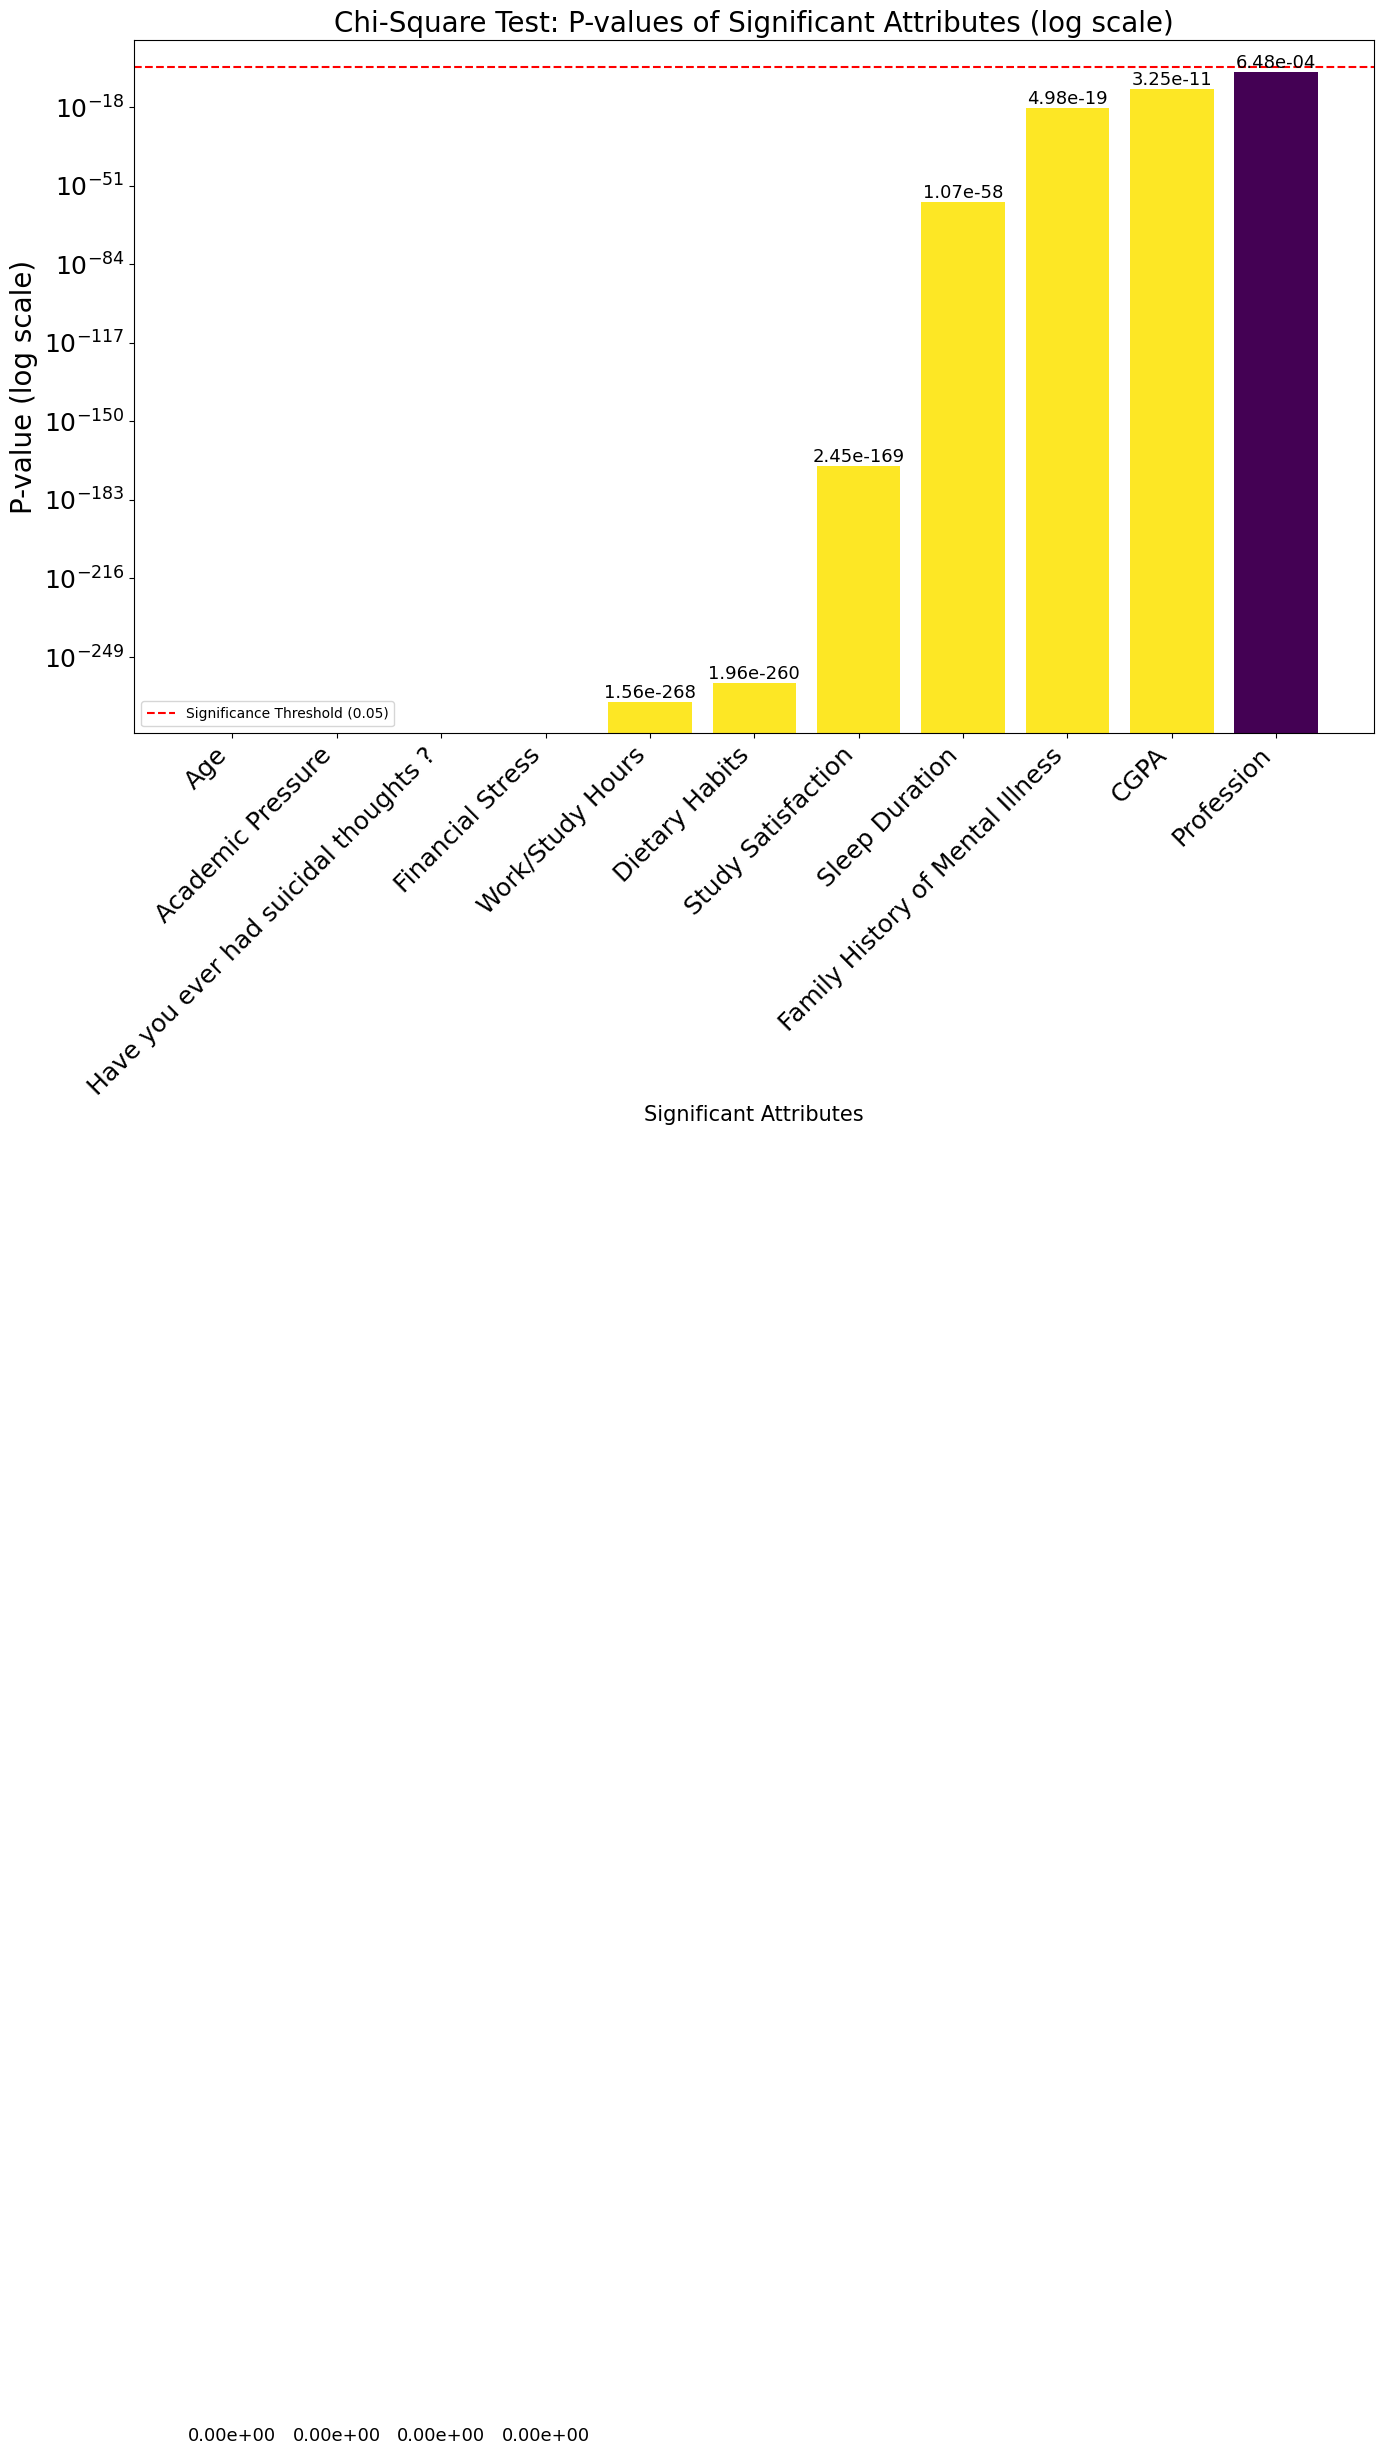

In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
import numpy as np

# Assuming 'df' is your DataFrame and 'Depression' is your target variable

significant_attributes = []
p_values = []

# Chi-square test for each column against 'Depression'
for column in df.columns:
    if column != 'Depression':
        contingency_table = pd.crosstab(df[column], df['Depression'])
        chi2, p, dof, expected = chi2_contingency(contingency_table)
        if p < 0.05:
            significant_attributes.append(column)
            p_values.append(p)

# Convert to DataFrame for sorting and plotting
pval_df = pd.DataFrame({
    'Attribute': significant_attributes,
    'P-value': p_values
}).sort_values(by='P-value')

# Color gradient based on p-value (darker = more significant)
norm = plt.Normalize(pval_df['P-value'].min(), pval_df['P-value'].max())
colors = plt.cm.viridis_r(norm(pval_df['P-value']))

# Plot setup
plt.figure(figsize=(16,9))
bars = plt.bar(pval_df['Attribute'], pval_df['P-value'], color=colors)

# Log scale for better visibility
plt.yscale('log')
plt.ylabel('P-value (log scale)',fontsize=20)
plt.xlabel('Significant Attributes',fontsize=15)
plt.title('Chi-Square Test: P-values of Significant Attributes (log scale)',fontsize=20)
plt.xticks(rotation=45, ha='right')

plt.xticks(rotation=45, ha='right', fontsize=18)
plt.yticks(fontsize=18)

# Add threshold line at 0.05
plt.axhline(y=0.05, color='red', linestyle='--', label='Significance Threshold (0.05)')

# Annotate each bar with its exact p-value
for bar, pval in zip(bars, pval_df['P-value']):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, f'{pval:.2e}',
             ha='center', va='bottom', fontsize=13)

plt.legend()
plt.tight_layout()

# Save as PDF
plt.savefig("significant_attributes_log_pvalue.pdf")
plt.show()


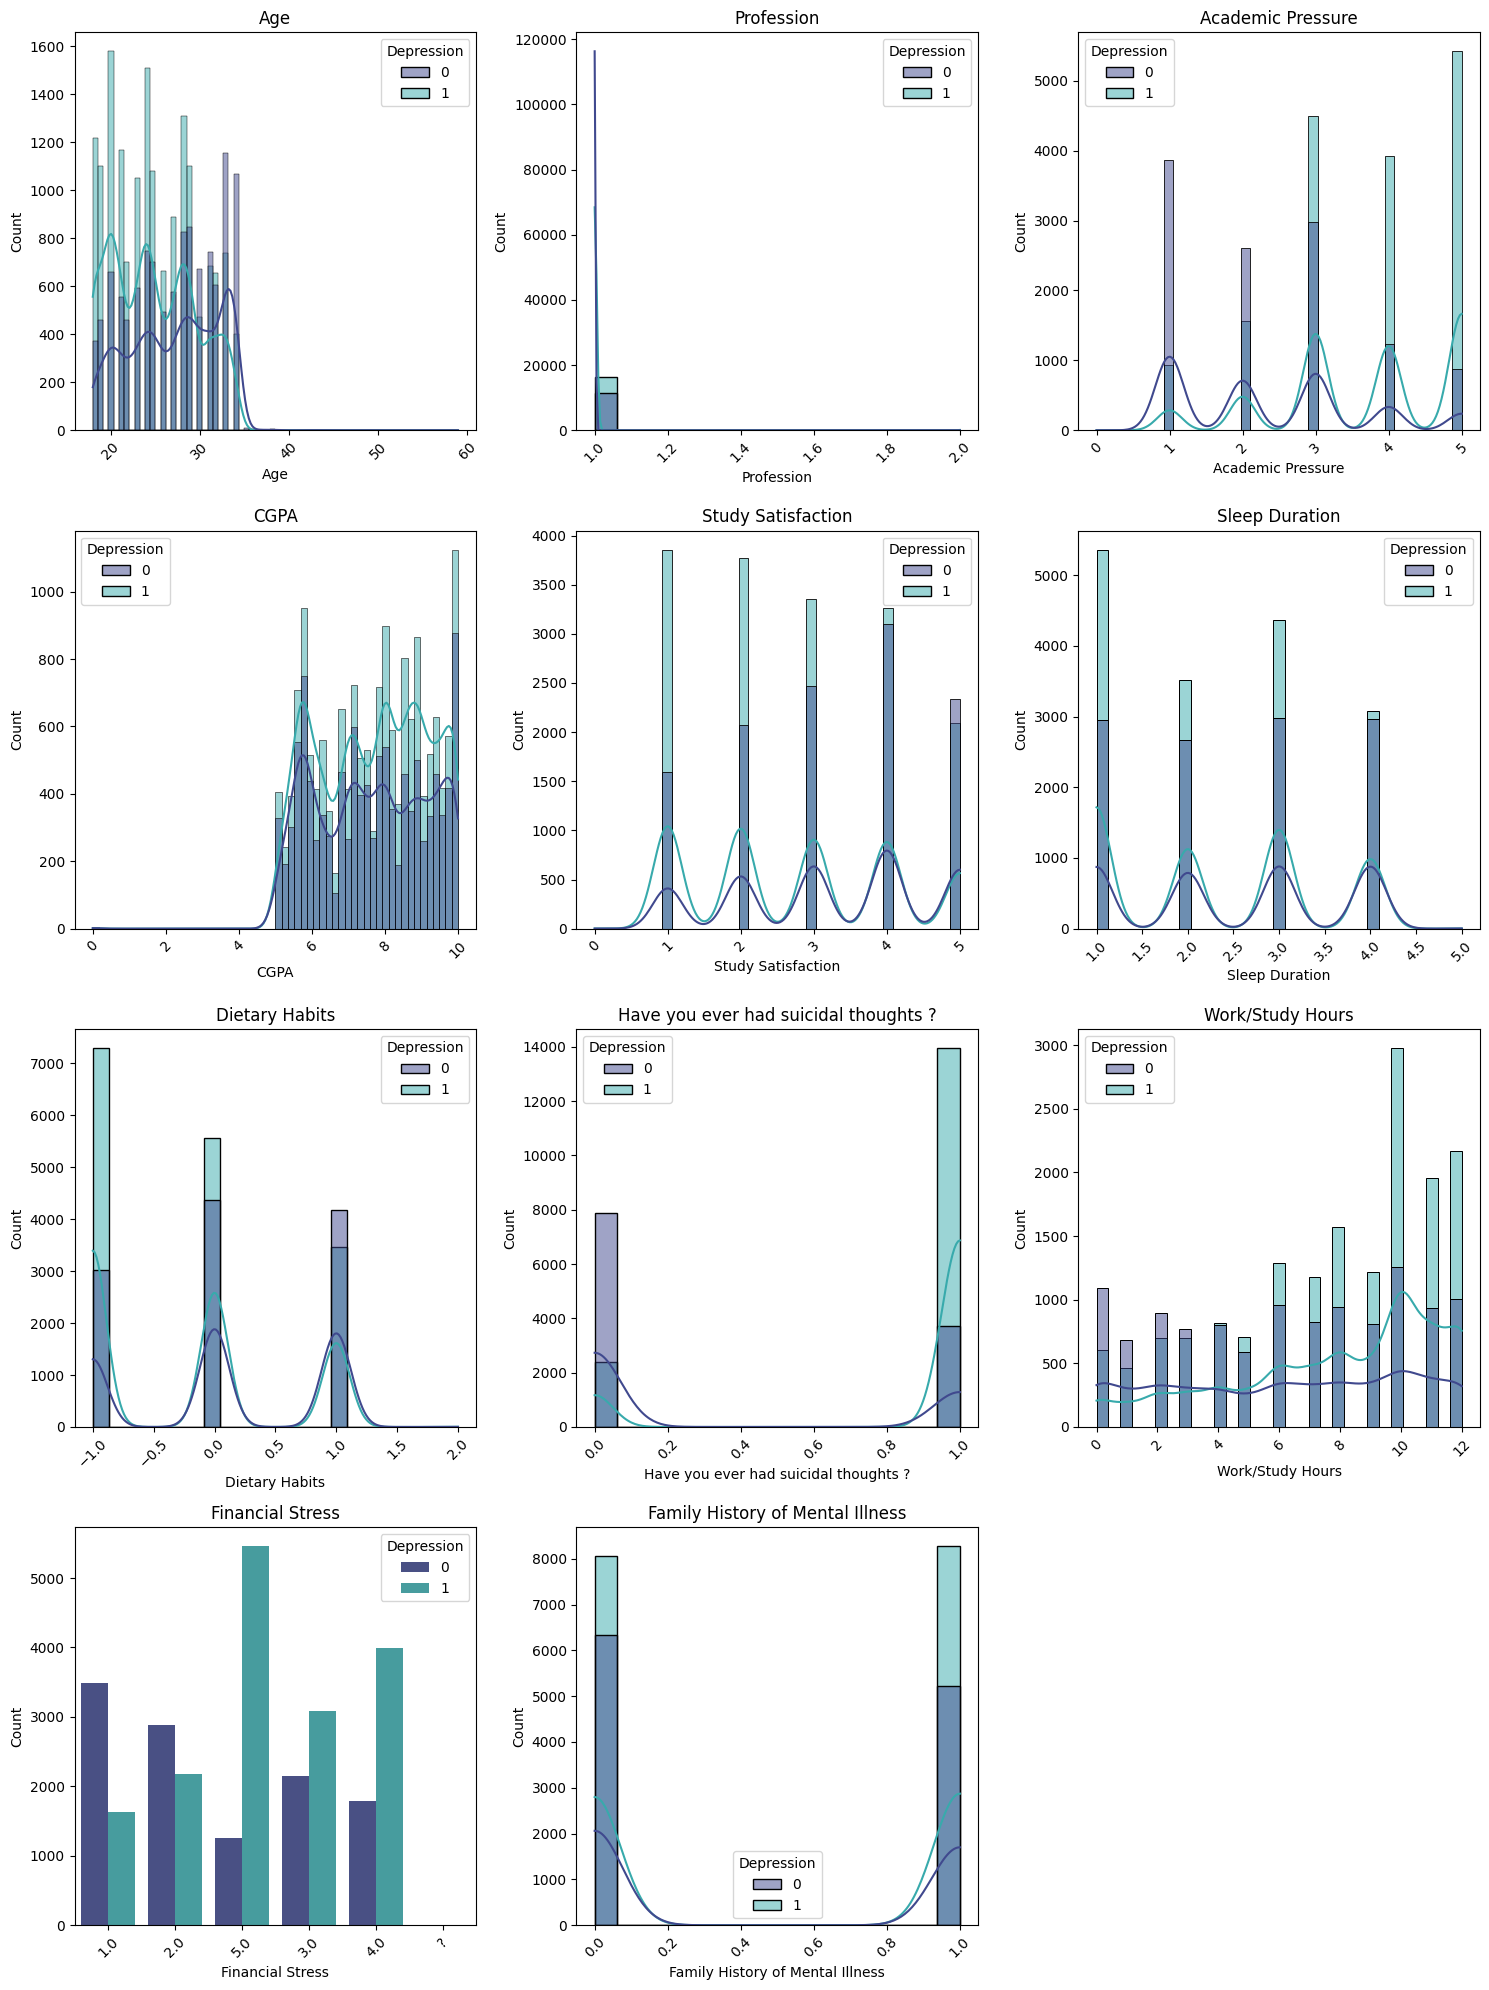

In [12]:
# prompt: show all significant attribut in one graph without pairplot in one graph

import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and the significant attributes are stored in a list called 'significant_attributes'
significant_attributes = []
for column in df.columns:
    if column != 'Depression':
        contingency_table = pd.crosstab(df[column], df['Depression'])
        chi2, p, dof, expected = chi2_contingency(contingency_table)
        if p < 0.05:
            significant_attributes.append(column)

num_attributes = len(significant_attributes)
num_rows = (num_attributes + 2) // 3  # Calculate the number of rows for subplots
fig, axes = plt.subplots(num_rows, 3, figsize=(15, 5 * num_rows))

for i, attribute in enumerate(significant_attributes):
    row = i // 3
    col = i % 3
    ax = axes[row, col] if num_rows > 1 else axes[col]

    # Choose appropriate plot type based on data type
    if pd.api.types.is_numeric_dtype(df[attribute]):
        sns.histplot(x=df[attribute], hue=df['Depression'], kde=True, ax=ax, palette="mako")
    else:
        sns.countplot(x=df[attribute], hue=df['Depression'], ax=ax, palette="mako")


    ax.set_title(attribute)
    ax.set_xlabel(attribute)
    ax.set_ylabel('Count')
    ax.tick_params(axis='x', rotation=45)

# Hide any unused subplots
for i in range(num_attributes, num_rows * 3):
    row = i // 3
    col = i % 3
    if num_rows > 1:
        fig.delaxes(axes[row, col])
    else:
        fig.delaxes(axes[col])


plt.tight_layout()
plt.show()


In [13]:
# Step 9: Initialize Models

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import AgglomerativeClustering  # Note: Unsupervised

# Add all models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Support Vector Machine': SVC(probability=True),
    'MLP Classifier': MLPClassifier(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    # 'Hierarchical Clustering': AgglomerativeClustering(n_clusters=3)  # Unsupervised, excluded from supervised evaluation
}

In [31]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Step 1: Replace '?' with np.nan in all features
X_train_sel = X_train[significant_attributes].replace('?', np.nan)
X_test_sel = X_test[significant_attributes].replace('?', np.nan)
X_valid_sel = X_valid[significant_attributes].replace('?', np.nan)

# Step 2: Convert all columns to numeric, coercing errors (so any non-convertible becomes np.nan)
X_train_sel = X_train_sel.apply(pd.to_numeric, errors='coerce')
X_test_sel = X_test_sel.apply(pd.to_numeric, errors='coerce')
X_valid_sel = X_valid_sel.apply(pd.to_numeric, errors='coerce')

# Step 3: Drop any rows with missing values (you can use imputation instead if you prefer)
train_mask = ~X_train_sel.isnull().any(axis=1)
test_mask = ~X_test_sel.isnull().any(axis=1)
valid_mask = ~X_valid_sel.isnull().any(axis=1)

X_train_sel = X_train_sel[train_mask]
y_train_clean = y_train[train_mask]
X_test_sel = X_test_sel[test_mask]
y_test_clean = y_test[test_mask]
X_valid_sel = X_valid_sel[valid_mask]
y_valid_clean = y_valid[valid_mask]

results = {}

for name, model in models.items():
    # Skip AgglomerativeClustering since it's unsupervised
    if name == 'Hierarchical Clustering':
        continue

    model.fit(X_train_sel, y_train_clean)

    y_train_pred = model.predict(X_train_sel)
    y_test_pred = model.predict(X_test_sel)
    y_valid_pred = model.predict(X_valid_sel)

    # Probabilities for AUC (if available)
    if hasattr(model, "predict_proba"):
        y_train_proba = model.predict_proba(X_train_sel)[:, 1]
        y_test_proba = model.predict_proba(X_test_sel)[:, 1]
        y_valid_proba = model.predict_proba(X_valid_sel)[:, 1]
    else:
        y_train_proba = y_train_pred
        y_test_proba = y_test_pred
        y_valid_proba = y_valid_pred

    results[name] = {
        'Train': {
            'Accuracy': accuracy_score(y_train_clean, y_train_pred),
            'Precision': precision_score(y_train_clean, y_train_pred),
            'Recall': recall_score(y_train_clean, y_train_pred),
            'F1': f1_score(y_train_clean, y_train_pred),
            'AUC': roc_auc_score(y_train_clean, y_train_proba)
        },
        'Test': {
            'Accuracy': accuracy_score(y_test_clean, y_test_pred),
            'Precision': precision_score(y_test_clean, y_test_pred),
            'Recall': recall_score(y_test_clean, y_test_pred),
            'F1': f1_score(y_test_clean, y_test_pred),
            'AUC': roc_auc_score(y_test_clean, y_test_proba)
        },
        'Validation': {
            'Accuracy': accuracy_score(y_valid_clean, y_valid_pred),
            'Precision': precision_score(y_valid_clean, y_valid_pred),
            'Recall': recall_score(y_valid_clean, y_valid_pred),
            'F1': f1_score(y_valid_clean, y_valid_pred),
            'AUC': roc_auc_score(y_valid_clean, y_valid_proba)
        }
    }

# Print results
for model_name, res in results.items():
    print(f"\nModel: {model_name}")
    for split in ['Train', 'Test', 'Validation']:
        print(f"  {split}: "
              f"Acc={res[split]['Accuracy']:.3f} | "
              f"Prec={res[split]['Precision']:.3f} | "
              f"Rec={res[split]['Recall']:.3f} | "
              f"F1={res[split]['F1']:.3f} | "
              f"AUC={res[split]['AUC']:.3f}")


Model: Logistic Regression
  Train: Acc=0.847 | Prec=0.856 | Rec=0.887 | F1=0.872 | AUC=0.921
  Test: Acc=0.849 | Prec=0.856 | Rec=0.891 | F1=0.873 | AUC=0.923
  Validation: Acc=0.846 | Prec=0.861 | Rec=0.879 | F1=0.870 | AUC=0.922

Model: K-Nearest Neighbors
  Train: Acc=0.860 | Prec=0.863 | Rec=0.905 | F1=0.884 | AUC=0.939
  Test: Acc=0.796 | Prec=0.804 | Rec=0.863 | F1=0.832 | AUC=0.857
  Validation: Acc=0.803 | Prec=0.818 | Rec=0.853 | F1=0.835 | AUC=0.862

Model: Naive Bayes
  Train: Acc=0.820 | Prec=0.907 | Rec=0.772 | F1=0.834 | AUC=0.918
  Test: Acc=0.827 | Prec=0.910 | Rec=0.781 | F1=0.841 | AUC=0.920
  Validation: Acc=0.819 | Prec=0.910 | Rec=0.766 | F1=0.832 | AUC=0.920

Model: Gradient Boosting
  Train: Acc=0.853 | Prec=0.861 | Rec=0.892 | F1=0.876 | AUC=0.926
  Test: Acc=0.851 | Prec=0.857 | Rec=0.895 | F1=0.876 | AUC=0.923
  Validation: Acc=0.852 | Prec=0.865 | Rec=0.884 | F1=0.875 | AUC=0.921

Model: AdaBoost
  Train: Acc=0.846 | Prec=0.858 | Rec=0.883 | F1=0.870 | AUC=

Test Set Results Table:
                        Accuracy  Precision    Recall        F1       AUC
Model                                                                    
Logistic Regression     0.848539   0.856176  0.891032  0.873256  0.923158
K-Nearest Neighbors     0.796200   0.803765  0.862565  0.832128  0.857119
Naive Bayes             0.826851   0.910453  0.781145  0.840857  0.919935
Gradient Boosting       0.851228   0.857436  0.894705  0.875674  0.923486
AdaBoost                0.847464   0.855713  0.889501  0.872280  0.923201
Support Vector Machine  0.849973   0.852378  0.899602  0.875354  0.922256
MLP Classifier          0.848898   0.860929  0.884910  0.872755  0.921658
Decision Tree           0.779710   0.807298  0.819406  0.813307  0.771511
Random Forest           0.841728   0.849355  0.887052  0.867795  0.914425


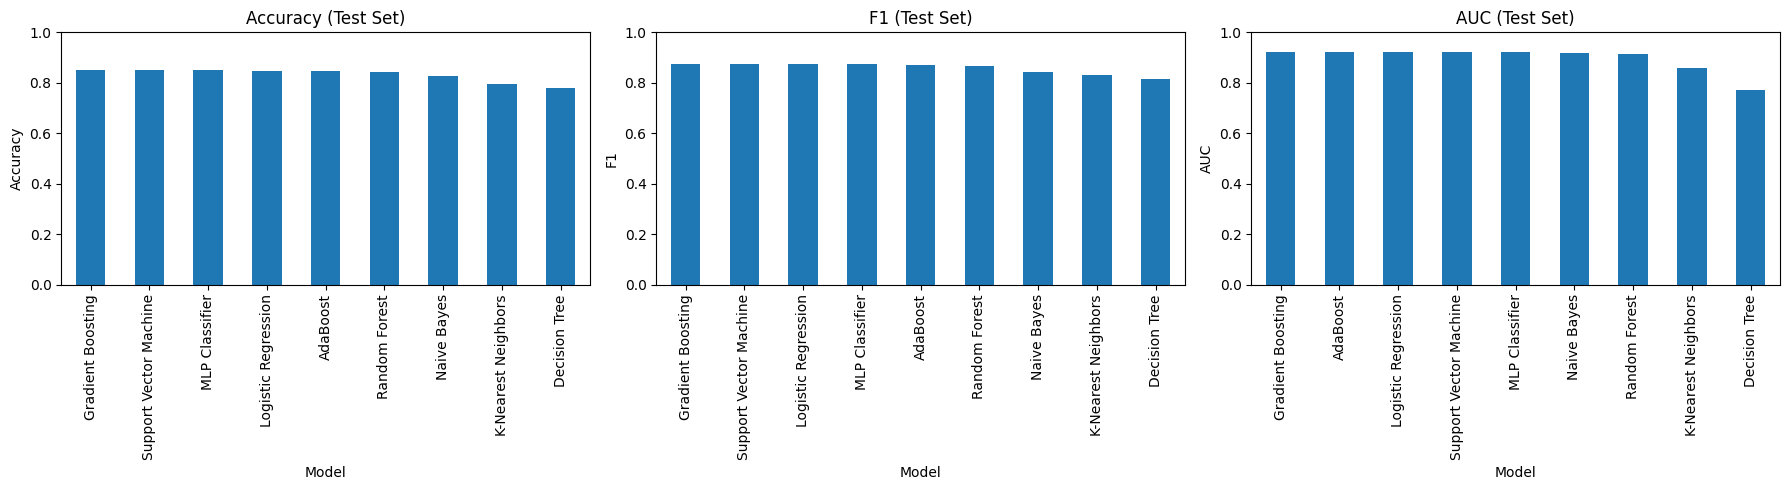

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 11: Tabulate and visualize all model results

# Convert results dict to DataFrame for easier plotting
rows = []
for model_name, res in results.items():
    for split in ['Train', 'Test', 'Validation']:
        row = {
            'Model': model_name,
            'Split': split,
            'Accuracy': res[split]['Accuracy'],
            'Precision': res[split]['Precision'],
            'Recall': res[split]['Recall'],
            'F1': res[split]['F1'],
            'AUC': res[split]['AUC']
        }
        rows.append(row)
results_df = pd.DataFrame(rows)

# Pivot for easier model comparison (Test split only)
test_df = results_df[results_df['Split'] == 'Test'].set_index('Model')

print("Test Set Results Table:")
print(test_df[['Accuracy', 'Precision', 'Recall', 'F1', 'AUC']])

# Plotting Accuracy, F1, and AUC for all models on Test set
metrics = ['Accuracy', 'F1', 'AUC']
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, metric in enumerate(metrics):
    test_df[metric].sort_values(ascending=False).plot(kind='bar', ax=axes[i])
    axes[i].set_title(f'{metric} (Test Set)')
    axes[i].set_ylabel(metric)
    axes[i].set_ylim(0, 1)

plt.tight_layout()
plt.show()

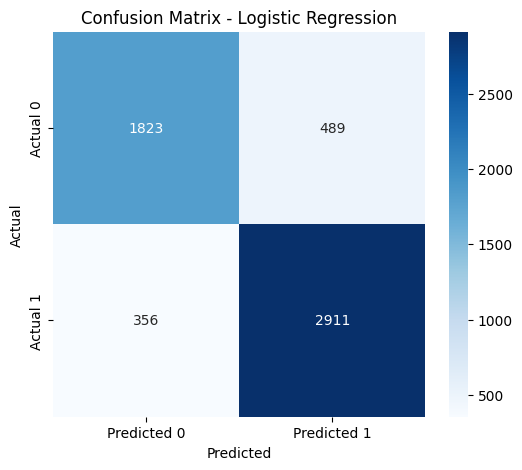

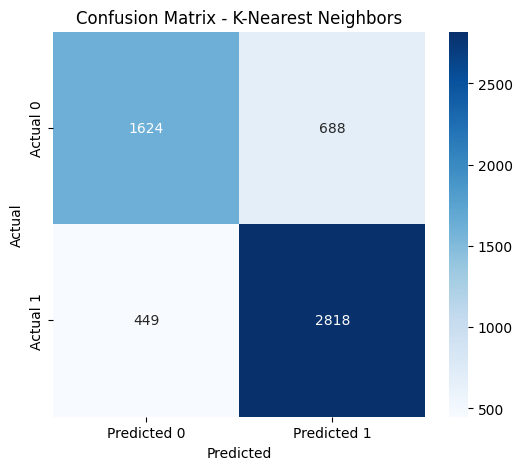

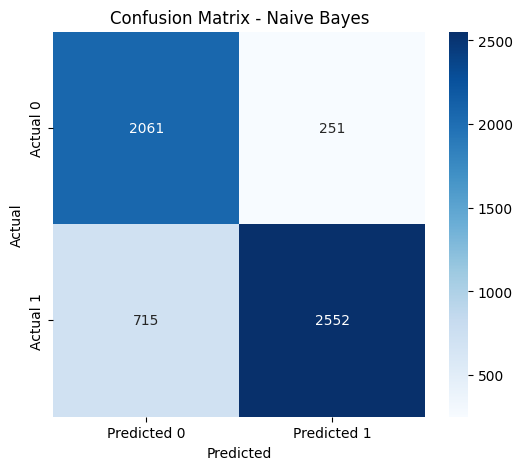

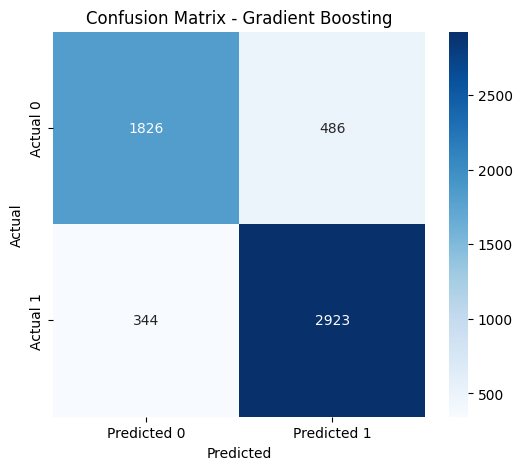

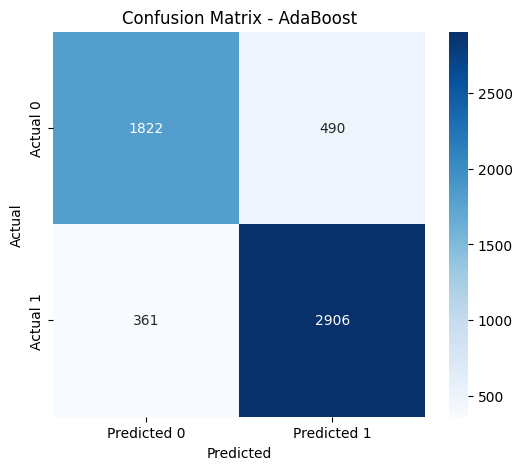

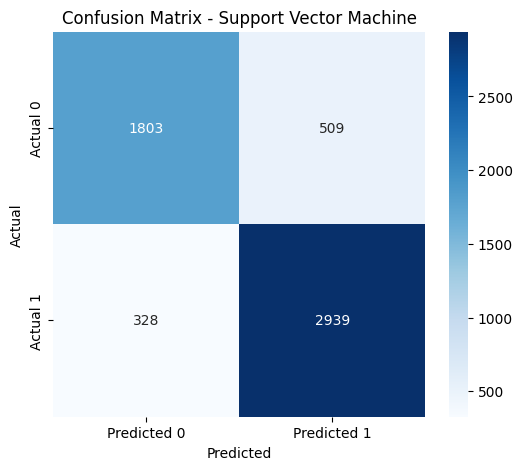

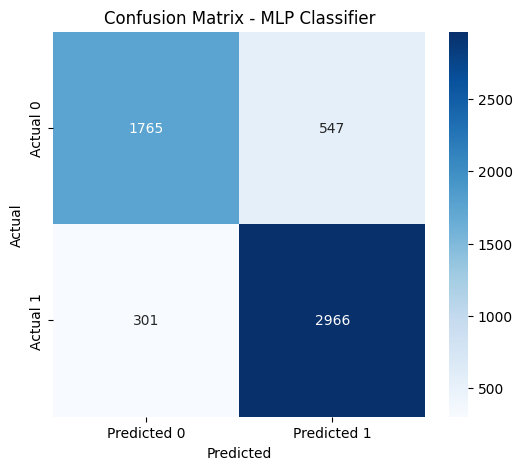

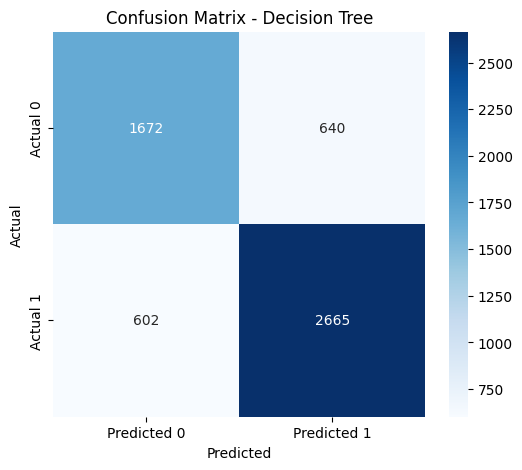

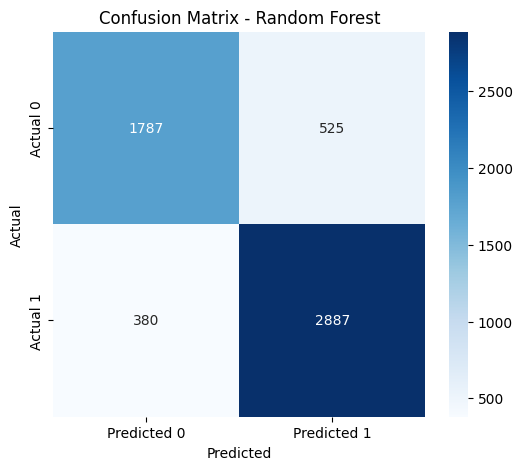

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Step 12: Confusion matrix plots for all models

for name, model in models.items():
    try:
        # Skip unsupervised models
        if name == 'Hierarchical Clustering':
            continue

        # Predict on the test set
        y_pred = model.predict(X_test_sel)

        # Compute the confusion matrix
        cm = confusion_matrix(y_test_clean, y_pred)

        # Plot the confusion matrix
        plt.figure(figsize=(6, 5))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                    xticklabels=['Predicted 0', 'Predicted 1'],
                    yticklabels=['Actual 0', 'Actual 1'])
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.title(f'Confusion Matrix - {name}')
        plt.show()

    except Exception as e:
        print(f"Error with model {name}: {e}")


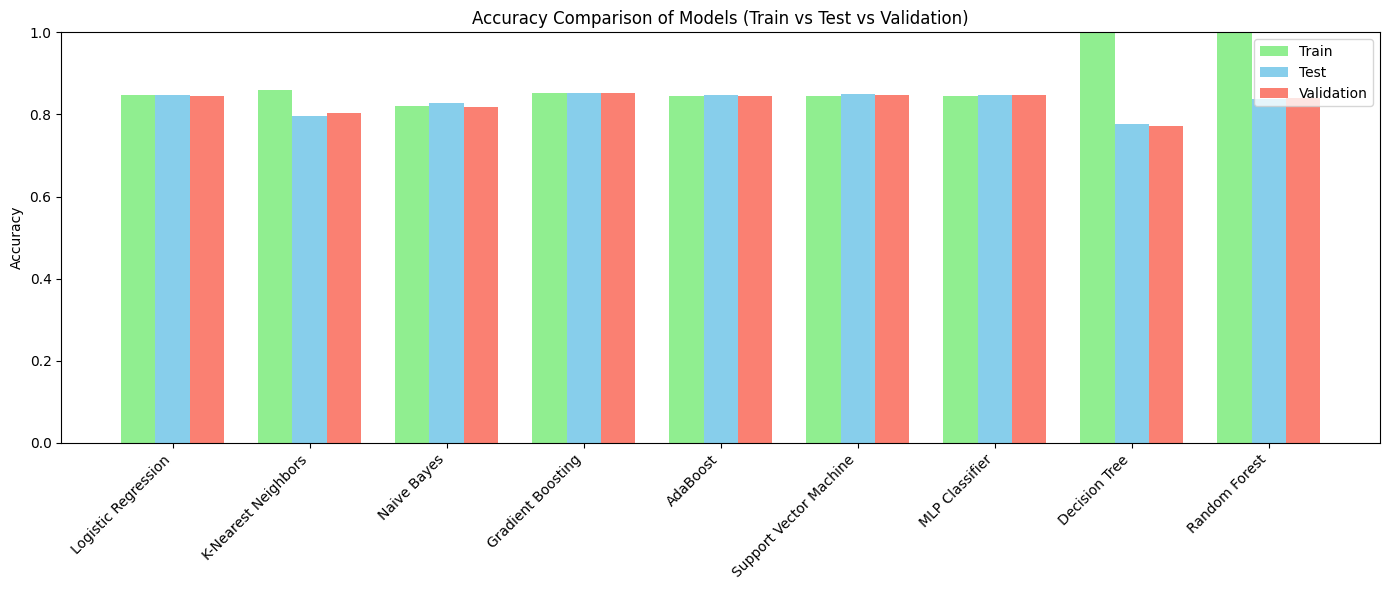

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score

accuracy_plot_data = {
    'Model': [],
    'Train': [],
    'Test': [],
    'Validation': []
}

for model_name, res in results.items():
    accuracy_plot_data['Model'].append(model_name)
    accuracy_plot_data['Train'].append(res['Train']['Accuracy'])
    accuracy_plot_data['Test'].append(res['Test']['Accuracy'])
    accuracy_plot_data['Validation'].append(res['Validation']['Accuracy'])

# Convert to DataFrame
acc_df = pd.DataFrame(accuracy_plot_data)

# Plot all in one grouped bar chart
x = np.arange(len(acc_df['Model']))
width = 0.25

plt.figure(figsize=(14, 6))
plt.bar(x - width, acc_df['Train'], width=width, label='Train', color='lightgreen')
plt.bar(x, acc_df['Test'], width=width, label='Test', color='skyblue')
plt.bar(x + width, acc_df['Validation'], width=width, label='Validation', color='salmon')

plt.xticks(x, acc_df['Model'], rotation=45, ha='right')
plt.ylabel("Accuracy")
plt.title("Accuracy Comparison of Models (Train vs Test vs Validation)")
plt.ylim(0, 1)
plt.legend()
plt.tight_layout()
plt.show()

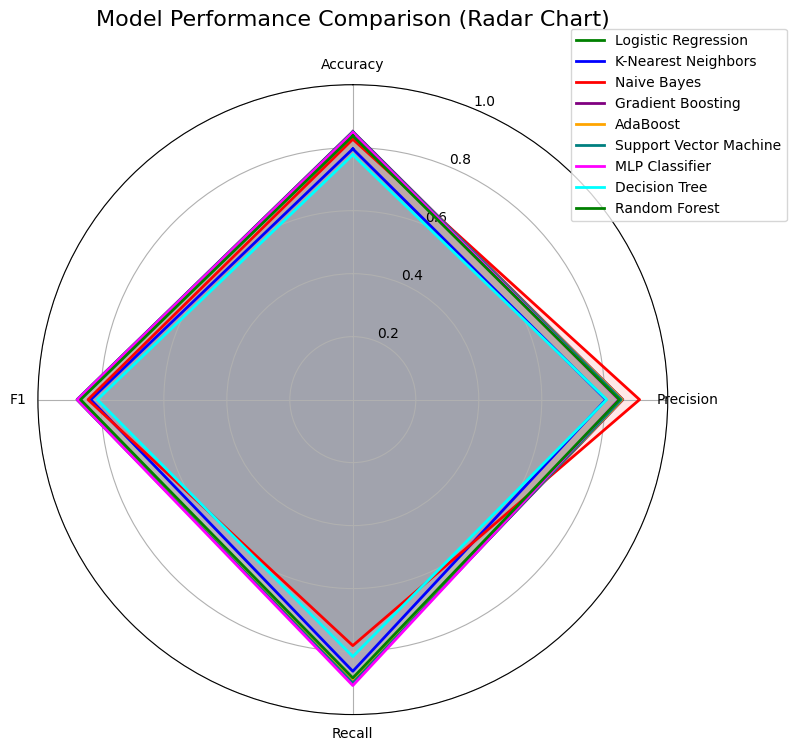

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Radar chart for model performance with white background and colored lines

# Select models and metrics for the radar chart
models_to_plot = results_df[results_df['Split'] == 'Test']['Model'].tolist()
metrics = ['Accuracy', 'Precision', 'Recall', 'F1']

# Prepare data for radar chart
data = []
for model in models_to_plot:
    values = results_df[(results_df['Model'] == model) & (results_df['Split'] == 'Test')][metrics].values.flatten().tolist()
    data.append(values)

# Radar chart setup
num_vars = len(metrics)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # close the loop

# Define line colors for each model (add more if you have more models)
line_colors = ['green', 'blue', 'red', 'purple', 'orange', 'teal', 'magenta', 'cyan']

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
fig.patch.set_facecolor('white')
ax.set_facecolor('white')

for i, values in enumerate(data):
    values += values[:1]  # close the loop
    color = line_colors[i % len(line_colors)]
    ax.plot(angles, values, label=models_to_plot[i], color=color, linewidth=2)
    ax.fill(angles, values, color=color, alpha=0.09)

ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
ax.set_thetagrids(np.degrees(angles[:-1]), metrics)
ax.set_ylim(0, 1)
plt.title("Model Performance Comparison (Radar Chart)", size=16, y=1.08, color='black')

plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1.1))
plt.tight_layout()
plt.show()

In [19]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define base learners for stacking
base_learners = [
    ('logreg', LogisticRegression()),
    ('knn', KNeighborsClassifier()),
    ('svc', SVC(probability=True)),
    ('ada', AdaBoostClassifier()),
    ('mlp', MLPClassifier(max_iter=1000))
]

# Meta-model
meta_model = LogisticRegression()

# All models dictionary including stacking
all_models = {
    'Logistic Regression': LogisticRegression(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'SVM': SVC(),
    'Naive Bayes': GaussianNB(),
    'MLP Classifier': MLPClassifier(max_iter=1000),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Stacking Classifier': StackingClassifier(estimators=base_learners, final_estimator=meta_model)
}

# Evaluation function
def evaluate_model(model, X_train, y_train, X_test, y_test, X_valid, y_valid):
    y_train_pred = model.predict(X_train)
    results_train = {
        'Accuracy': accuracy_score(y_train, y_train_pred),
        'Precision': precision_score(y_train, y_train_pred, average='weighted', zero_division=1),
        'Recall': recall_score(y_train, y_train_pred, average='weighted', zero_division=1),
        'F1-Score': f1_score(y_train, y_train_pred, average='weighted', zero_division=1)
    }

    y_test_pred = model.predict(X_test)
    results_test = {
        'Accuracy': accuracy_score(y_test, y_test_pred),
        'Precision': precision_score(y_test, y_test_pred, average='weighted', zero_division=1),
        'Recall': recall_score(y_test, y_test_pred, average='weighted', zero_division=1),
        'F1-Score': f1_score(y_test, y_test_pred, average='weighted', zero_division=1)
    }

    y_valid_pred = model.predict(X_valid)
    results_valid = {
        'Accuracy': accuracy_score(y_valid, y_valid_pred),
        'Precision': precision_score(y_valid, y_valid_pred, average='weighted', zero_division=1),
        'Recall': recall_score(y_valid, y_valid_pred, average='weighted', zero_division=1),
        'F1-Score': f1_score(y_valid, y_valid_pred, average='weighted', zero_division=1)
    }

    return results_train, results_test, results_valid

# Fit and evaluate all models
for model_name, model in all_models.items():
    try:
        model.fit(X_train_sel, y_train_clean)
        train_results, test_results, valid_results = evaluate_model(
            model, X_train_sel, y_train_clean, X_test_sel, y_test_clean, X_valid_sel, y_valid_clean
        )

        print(f"\n📌 Model: {model_name}")
        print(f"Train: {train_results}")
        print(f"Test:  {test_results}")
        print(f"Valid: {valid_results}")
    except Exception as e:
        print(f"⚠️ Error in model {model_name}: {e}")


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



📌 Model: Logistic Regression
Train: {'Accuracy': 0.8467328963539533, 'Precision': 0.8462211424562862, 'Recall': 0.8467328963539533, 'F1-Score': 0.8460860419076092}
Test:  {'Accuracy': 0.8488976519089443, 'Precision': 0.8484301874289948, 'Recall': 0.8488976519089443, 'F1-Score': 0.8481797985087973}
Valid: {'Accuracy': 0.8466499462558222, 'Precision': 0.8461866060863307, 'Recall': 0.8466499462558222, 'F1-Score': 0.8462736672048425}

📌 Model: K-Nearest Neighbors
Train: {'Accuracy': 0.8603543629659975, 'Precision': 0.8601324859422282, 'Recall': 0.8603543629659975, 'F1-Score': 0.8595470576978619}
Test:  {'Accuracy': 0.7962000358487185, 'Precision': 0.7953278601145363, 'Recall': 0.7962000358487185, 'F1-Score': 0.7942418421094416}
Valid: {'Accuracy': 0.8025797205302759, 'Precision': 0.8015980384819145, 'Recall': 0.8025797205302759, 'F1-Score': 0.8015541040826585}

📌 Model: SVM
Train: {'Accuracy': 0.8460671855796804, 'Precision': 0.8456199040271729, 'Recall': 0.8460671855796804, 'F1-Score': 0

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c


📌 Model: Stacking Classifier
Train: {'Accuracy': 0.8504199098730029, 'Precision': 0.8499349628819949, 'Recall': 0.8504199098730029, 'F1-Score': 0.8499258314618183}
Test:  {'Accuracy': 0.8515863057895681, 'Precision': 0.851139805744241, 'Recall': 0.8515863057895681, 'F1-Score': 0.8508994248412461}
Valid: {'Accuracy': 0.8470082407739161, 'Precision': 0.8465997177828056, 'Recall': 0.8470082407739161, 'F1-Score': 0.8467102441102982}


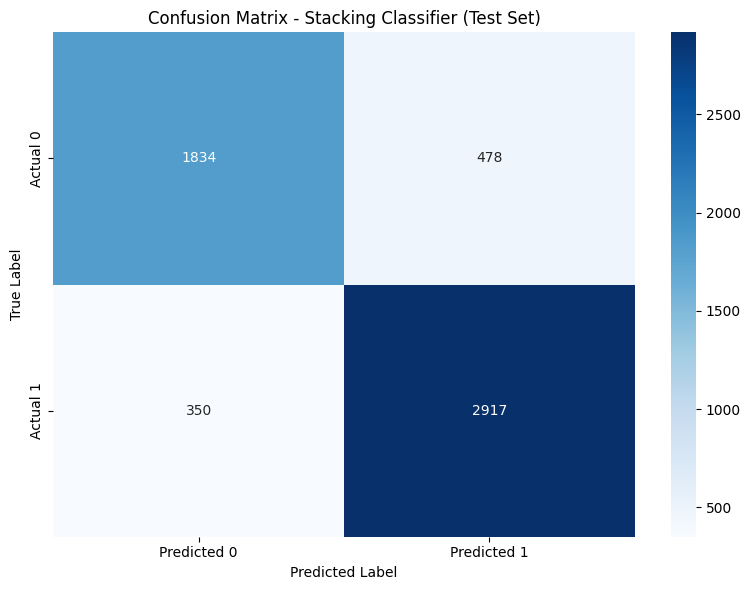

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Get the trained Stacking Classifier from the models dictionary
stacking_clf = all_models['Stacking Classifier']

# Make predictions using the test set
y_pred = stacking_clf.predict(X_test_sel)
cm = confusion_matrix(y_test_clean, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Stacking Classifier (Test Set)')
plt.tight_layout()
plt.savefig('confusion_matrix_stacking.png')  # Optional: save the figure
plt.show()


Save this confussion Metrix

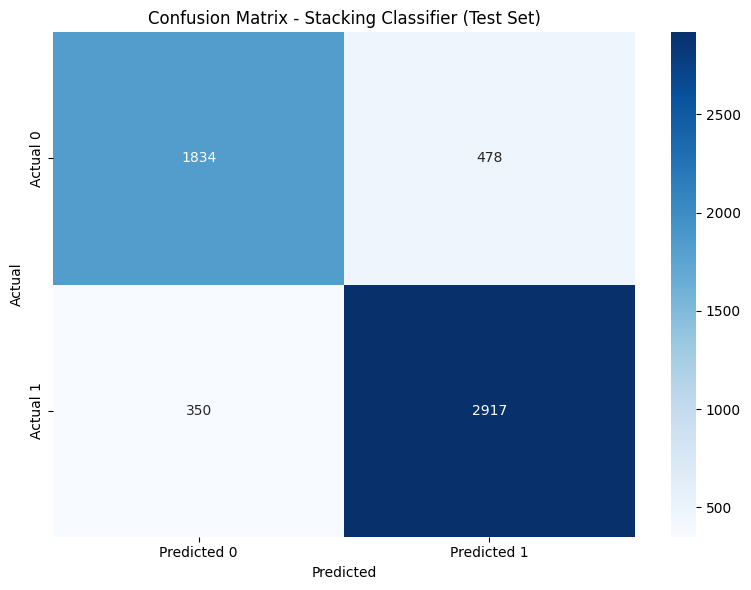

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Get the trained stacking model from the dictionary
stacking_clf = all_models['Stacking Classifier']

# Predict on the cleaned test data
y_pred = stacking_clf.predict(X_test_sel)
cm = confusion_matrix(y_test_clean, y_pred)

# Plot the confusion matrix and save it
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Stacking Classifier (Test Set)')
plt.tight_layout()

# Save the confusion matrix as an image
plt.savefig('stacking_confusion_matrix.png', dpi=300)

# Display the plot
plt.show()


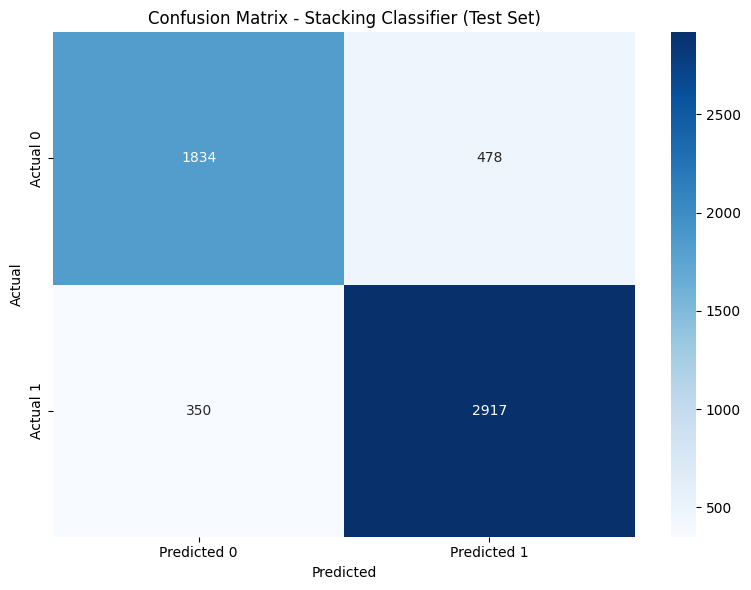

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Ensure the stacking classifier is retrieved from your trained models
stacking_clf = all_models['Stacking Classifier']

# Predict on the cleaned test set
y_pred = stacking_clf.predict(X_test_sel)
cm = confusion_matrix(y_test_clean, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Stacking Classifier (Test Set)')
plt.tight_layout()
plt.show()


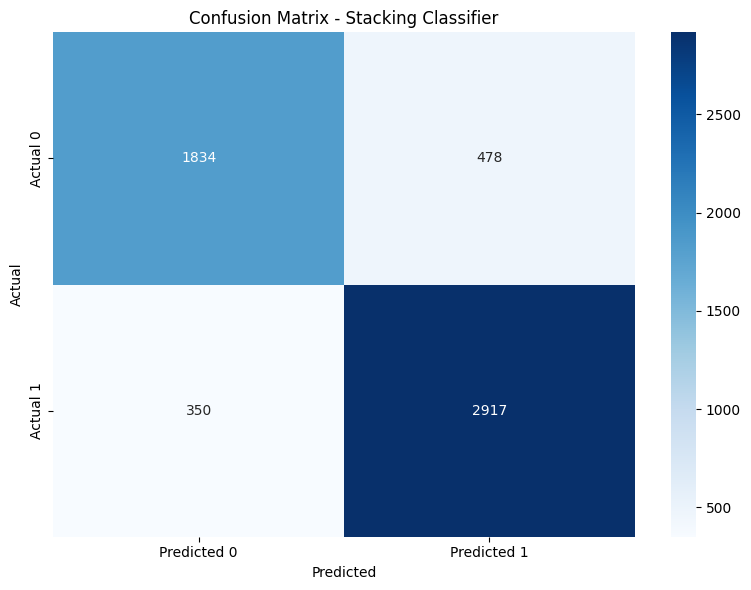

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Use your cleaned test data variables
y_pred = stacking_clf.predict(X_test_sel)
cm = confusion_matrix(y_test_clean, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Stacking Classifier')
plt.tight_layout()

plt.savefig("confusion_matrix.pdf")  # Save as PDF
plt.show()


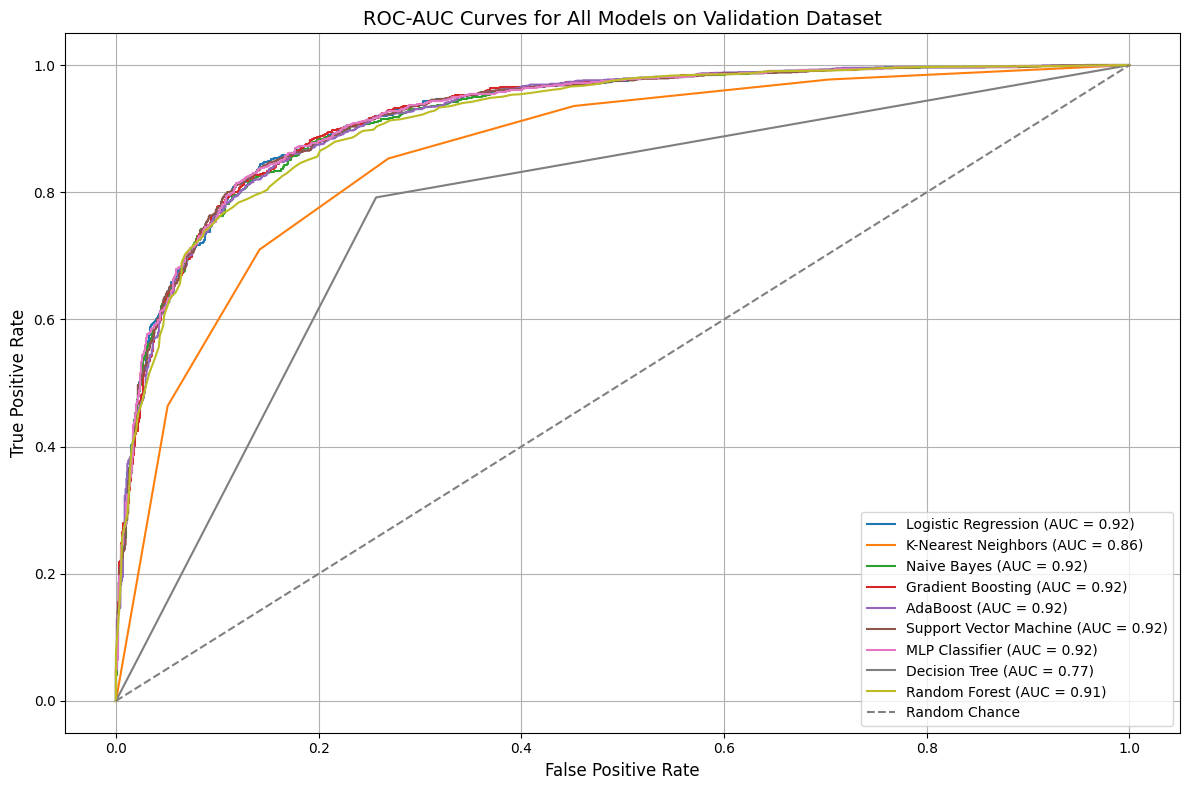


AUC Scores on Validation Dataset:
Logistic Regression: AUC = 0.92
K-Nearest Neighbors: AUC = 0.86
Naive Bayes: AUC = 0.92
Gradient Boosting: AUC = 0.92
AdaBoost: AUC = 0.92
Support Vector Machine: AUC = 0.92
MLP Classifier: AUC = 0.92
Decision Tree: AUC = 0.77
Random Forest: AUC = 0.91


In [24]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Initialize a dictionary to store ROC-AUC scores
roc_auc_scores_valid = {}

# Plot ROC curves for all models
plt.figure(figsize=(12, 8))
for name, model in models.items():
    try:
        # Skip clustering or models that don't support predict_proba or decision_function
        if not (hasattr(model, "predict_proba") or hasattr(model, "decision_function")):
            continue

        # Predict probabilities or decision scores for the positive class
        if hasattr(model, "predict_proba"):
            y_scores_valid = model.predict_proba(X_valid_sel)[:, 1]
        else:  # hasattr(model, "decision_function")
            y_scores_valid = model.decision_function(X_valid_sel)

        # Compute ROC curve and AUC
        fpr, tpr, _ = roc_curve(y_valid_clean, y_scores_valid)
        roc_auc = auc(fpr, tpr)
        roc_auc_scores_valid[name] = roc_auc

        # Plot ROC curve
        plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

    except Exception as e:
        print(f"Error with model {name}: {e}")

# Plot random chance line
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random Chance')

# Final plot adjustments
plt.title('ROC-AUC Curves for All Models on Validation Dataset', size=14)
plt.xlabel('False Positive Rate', size=12)
plt.ylabel('True Positive Rate', size=12)
plt.legend(loc='lower right', fontsize=10)
plt.grid(True)
plt.tight_layout()
plt.show()

# Display AUC scores
print("\nAUC Scores on Validation Dataset:")
for name, auc_score in roc_auc_scores_valid.items():
    print(f"{name}: AUC = {auc_score:.2f}")


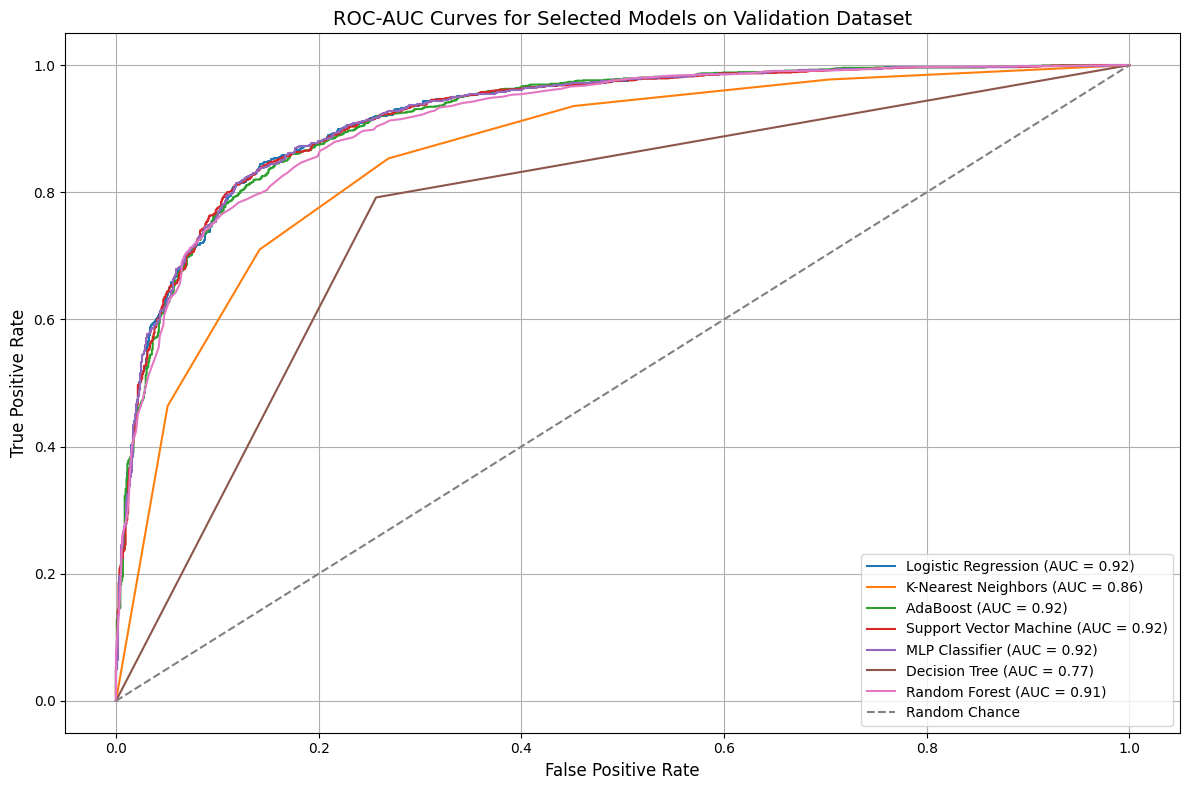


AUC Scores on Validation Dataset (Selected Models):
Logistic Regression: AUC = 0.92
K-Nearest Neighbors: AUC = 0.86
AdaBoost: AUC = 0.92
Support Vector Machine: AUC = 0.92
MLP Classifier: AUC = 0.92
Decision Tree: AUC = 0.77
Random Forest: AUC = 0.91


In [25]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Initialize a dictionary to store ROC-AUC scores
roc_auc_scores_valid = {}

# Plot ROC curves for specified models on validation set
plt.figure(figsize=(12, 8))
for name, model in models.items():
    if name not in ['Naive Bayes', 'Gradient Boosting']:  # Ignore these if needed
        try:
            # Predict probabilities for the positive class
            if hasattr(model, "predict_proba"):
                y_scores_valid = model.predict_proba(X_valid_sel)[:, 1]
            elif hasattr(model, "decision_function"):
                y_scores_valid = model.decision_function(X_valid_sel)
            else:
                continue  # Skip models without probability or decision function

            # Compute ROC curve and AUC
            fpr, tpr, _ = roc_curve(y_valid_clean, y_scores_valid)
            roc_auc = auc(fpr, tpr)
            roc_auc_scores_valid[name] = roc_auc

            # Plot ROC curve
            plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

        except Exception as e:
            print(f"Error with model {name}: {e}")

# Plot random chance line
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random Chance')

# Final plot adjustments
plt.title('ROC-AUC Curves for Selected Models on Validation Dataset', size=14)
plt.xlabel('False Positive Rate', size=12)
plt.ylabel('True Positive Rate', size=12)
plt.legend(loc='lower right', fontsize=10)
plt.grid()
plt.tight_layout()
plt.show()

# Display AUC scores for the plotted models
print("\nAUC Scores on Validation Dataset (Selected Models):")
for name, auc_score in roc_auc_scores_valid.items():
    print(f"{name}: AUC = {auc_score:.2f}")


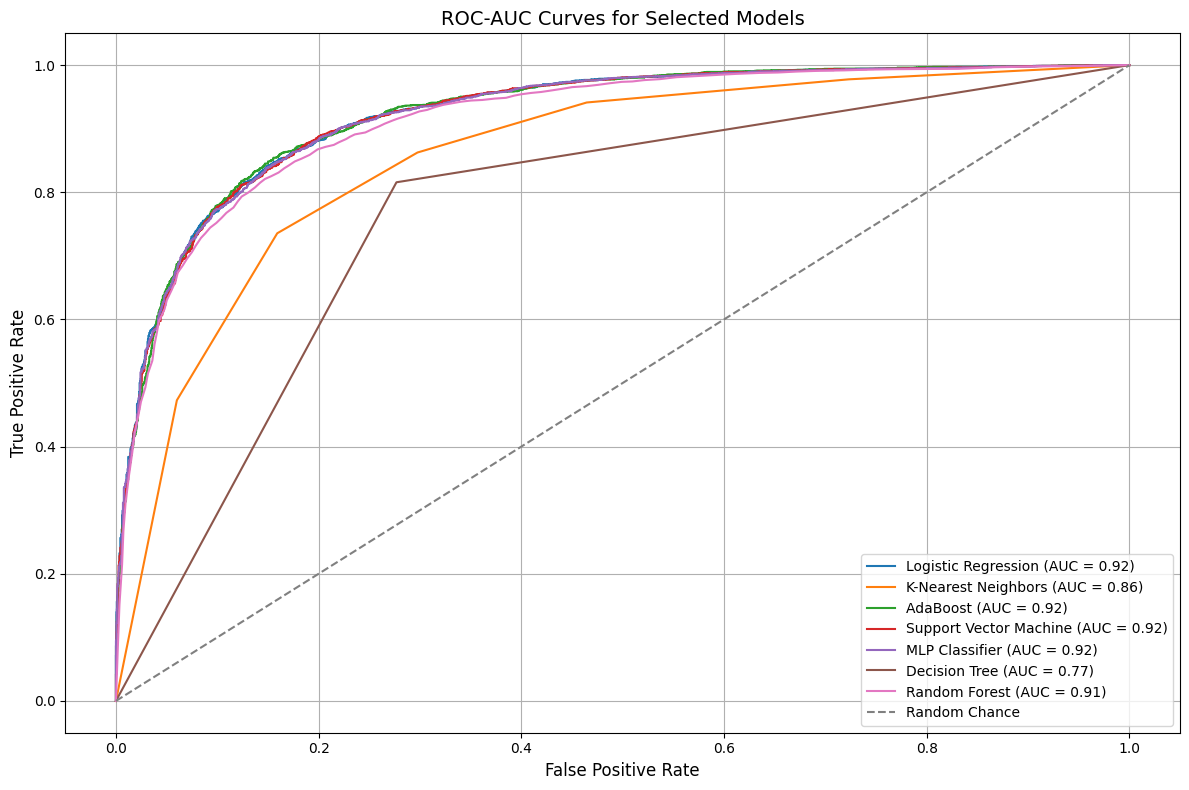


AUC Scores on Test Dataset (Selected Models):
Logistic Regression: AUC = 0.92
K-Nearest Neighbors: AUC = 0.86
AdaBoost: AUC = 0.92
Support Vector Machine: AUC = 0.92
MLP Classifier: AUC = 0.92
Decision Tree: AUC = 0.77
Random Forest: AUC = 0.91


In [26]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Initialize dictionary to store test AUC scores
roc_auc_scores_test = {}

# Plot ROC curves for test set
plt.figure(figsize=(12, 8))
for name, model in models.items():
    if name not in ['Naive Bayes', 'Gradient Boosting']:  # Skip these if needed
        try:
            # Predict probabilities or decision scores
            if hasattr(model, "predict_proba"):
                y_scores_test = model.predict_proba(X_test_sel)[:, 1]
            elif hasattr(model, "decision_function"):
                y_scores_test = model.decision_function(X_test_sel)
            else:
                continue  # Skip models without appropriate methods

            # Compute ROC and AUC
            fpr, tpr, _ = roc_curve(y_test_clean, y_scores_test)
            roc_auc = auc(fpr, tpr)
            roc_auc_scores_test[name] = roc_auc

            # Plot ROC curve
            plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

        except Exception as e:
            print(f"Error with model {name}: {e}")

# Plot random chance line
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random Chance')

# Final plot formatting
plt.title('ROC-AUC Curves for Selected Models', size=14)
plt.xlabel('False Positive Rate', size=12)
plt.ylabel('True Positive Rate', size=12)
plt.legend(loc='lower right', fontsize=10)
plt.grid()
plt.tight_layout()

# Save plot to PDF
plt.savefig("roc_auc_test.pdf")
plt.show()

# Display AUC scores for the test set
print("\nAUC Scores on Test Dataset (Selected Models):")
for name, auc_score in roc_auc_scores_test.items():
    print(f"{name}: AUC = {auc_score:.2f}")


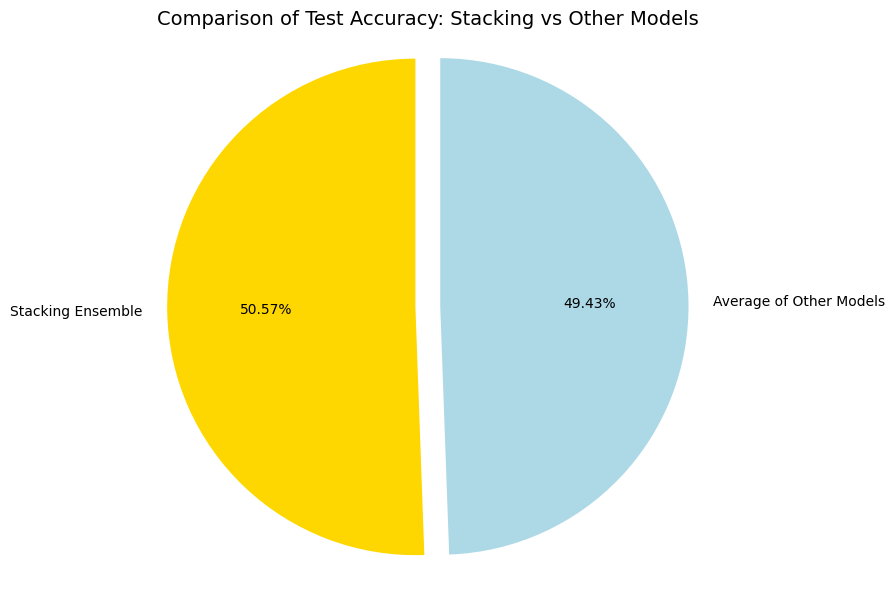

In [32]:
import matplotlib.pyplot as plt
import numpy as np

# Extract Stacking model accuracy from the all_models dictionary
stacking_accuracy = all_models['Stacking Classifier'].score(X_test_sel, y_test_clean)

# Compute average accuracy of all other models from the results dictionary
other_accuracies = [res['Test']['Accuracy'] for name, res in results.items()]
avg_other_accuracy = np.mean(other_accuracies)

# Create pie chart data
labels = ['Stacking Ensemble', 'Average of Other Models']
sizes = [stacking_accuracy, avg_other_accuracy]
colors = ['gold', 'lightblue']
explode = (0.1, 0)  # explode the Stacking slice

# Plot
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%1.2f%%', startangle=90, colors=colors, explode=explode)
plt.title('Comparison of Test Accuracy: Stacking vs Other Models', fontsize=14)
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular
plt.tight_layout()
plt.show()

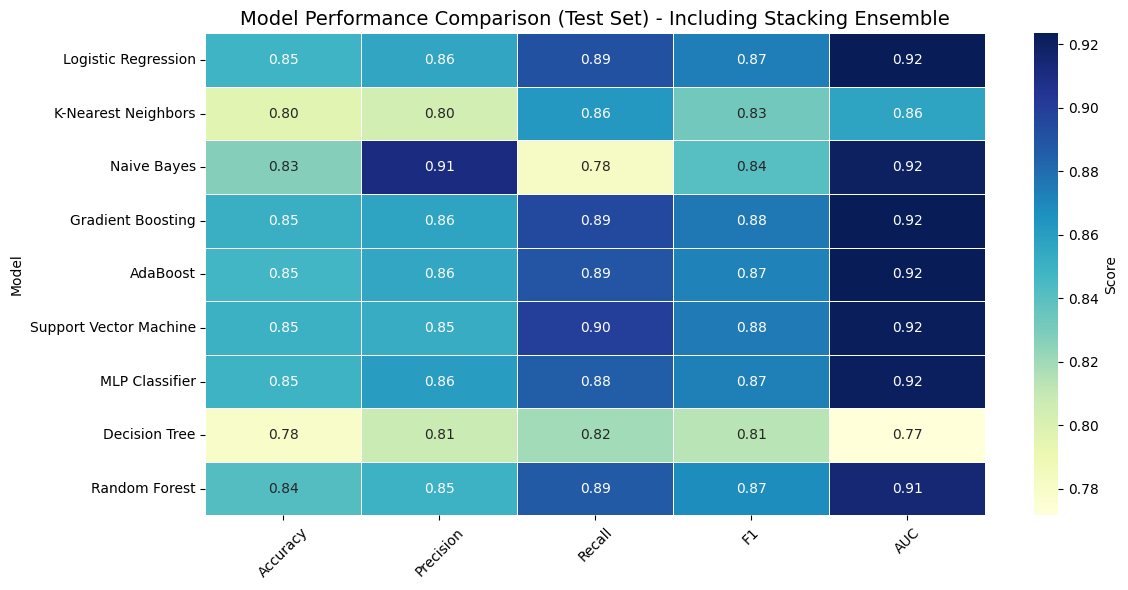

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Create a new DataFrame from the 'results' dictionary for the Test set only
heatmap_data = {
    'Model': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1': [],
    'AUC': []
}

for model_name, metrics in results.items():
    test_metrics = metrics['Test']
    heatmap_data['Model'].append(model_name)
    heatmap_data['Accuracy'].append(test_metrics['Accuracy'])
    heatmap_data['Precision'].append(test_metrics['Precision'])
    heatmap_data['Recall'].append(test_metrics['Recall'])
    heatmap_data['F1'].append(test_metrics['F1'])
    heatmap_data['AUC'].append(test_metrics['AUC'])

# Convert to DataFrame
heatmap_df = pd.DataFrame(heatmap_data)
heatmap_df.set_index('Model', inplace=True)

# Plot the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_df, annot=True, cmap='YlGnBu', fmt=".2f", linewidths=0.5, cbar_kws={"label": "Score"})
plt.title("Model Performance Comparison (Test Set) - Including Stacking Ensemble", fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


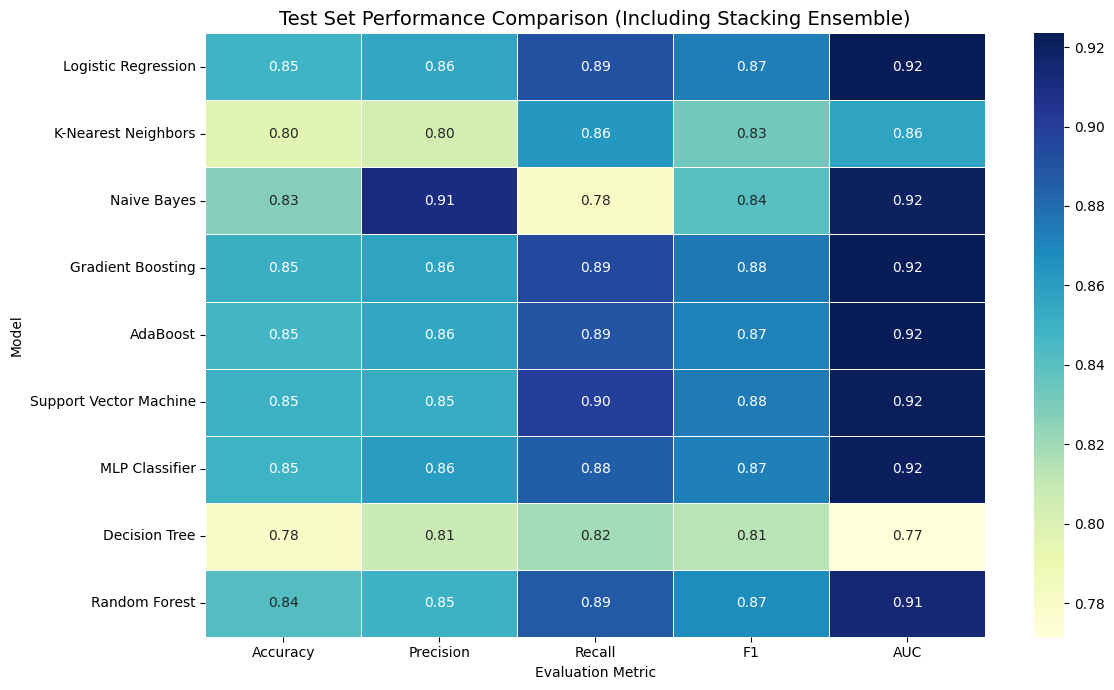

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Extract all test metrics from results into a DataFrame
metrics = ['Accuracy', 'Precision', 'Recall', 'F1', 'AUC']
model_names = []
data = []

for model_name, res in results.items():
    test_metrics = res['Test']
    row = [test_metrics[m] for m in metrics]
    data.append(row)
    model_names.append(model_name)

# Create DataFrame
heatmap_df = pd.DataFrame(data, columns=metrics, index=model_names)

# Plot heatmap
plt.figure(figsize=(12, 7))
sns.heatmap(heatmap_df, annot=True, cmap='YlGnBu', fmt=".2f", linewidths=0.5)
plt.title("Test Set Performance Comparison (Including Stacking Ensemble)", fontsize=14)
plt.xlabel("Evaluation Metric")
plt.ylabel("Model")
plt.tight_layout()
plt.show()


In [44]:
# If stacking model not already in 'results', extract and add it
if 'Stacking Classifier' not in results:
    stacking_test_results = evaluate_model(
        all_models['Stacking Classifier'],
        X_train_sel, y_train_clean,
        X_test_sel, y_test_clean,
        X_valid_sel, y_valid_clean
    )[1]  # Index 1 = Test split

    # Manually add Stacking Classifier test results to 'results'
    results['Stacking Classifier'] = {
        'Test': {
            'Accuracy': stacking_test_results['Accuracy'],
            'Precision': stacking_test_results['Precision'],
            'Recall': stacking_test_results['Recall'],
            'F1': stacking_test_results['F1-Score'],
            'AUC': roc_auc_score(y_test_clean, all_models['Stacking Classifier Ensemble Model'].predict_proba(X_test_sel)[:, 1])
        }
    }


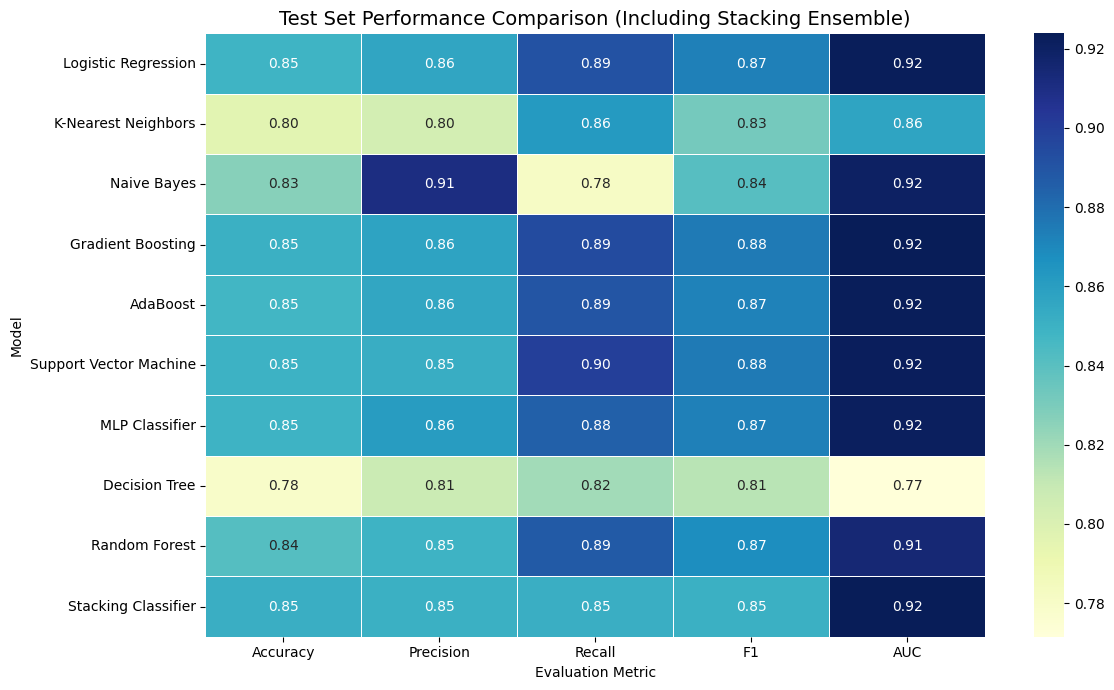

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Extract all test metrics from results into a DataFrame
metrics = ['Accuracy', 'Precision', 'Recall', 'F1', 'AUC']
model_names = []
data = []

for model_name, res in results.items():
    if 'Test' in res:  # Skip models that don't have Test data
        test_metrics = res['Test']
        row = [test_metrics.get(m, 0) for m in metrics]  # Use 0 if metric is missing
        data.append(row)
        model_names.append(model_name)

# Create DataFrame
heatmap_df = pd.DataFrame(data, columns=metrics, index=model_names)

# Plot heatmap
plt.figure(figsize=(12, 7))
sns.heatmap(heatmap_df, annot=True, cmap='YlGnBu', fmt=".2f", linewidths=0.5)
plt.title("Test Set Performance Comparison (Including Stacking Ensemble)", fontsize=14)
plt.xlabel("Evaluation Metric")
plt.ylabel("Model")
plt.tight_layout()
plt.show()


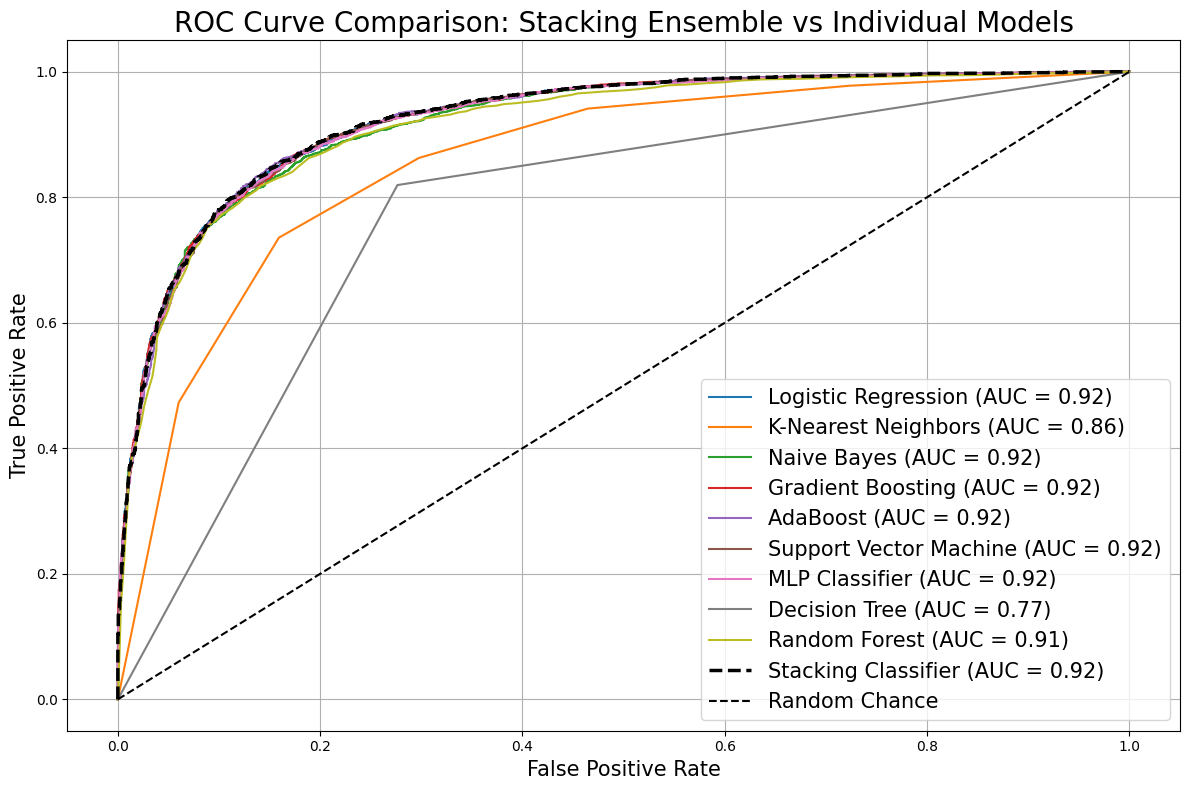


AUC Scores on Test Dataset:
Logistic Regression: AUC = 0.923
K-Nearest Neighbors: AUC = 0.857
Naive Bayes: AUC = 0.920
Gradient Boosting: AUC = 0.923
AdaBoost: AUC = 0.923
Support Vector Machine: AUC = 0.922
MLP Classifier: AUC = 0.922
Decision Tree: AUC = 0.772
Random Forest: AUC = 0.914
Stacking Classifier: AUC = 0.924


In [49]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Initialize dictionary to store ROC-AUC scores
roc_auc_scores_comparison = {}

# Create a new figure for plotting
plt.figure(figsize=(12, 8))

# Plot ROC curves for individual models
for name, model in models.items():
    if hasattr(model, "predict_proba"):
        try:
            y_score = model.predict_proba(X_test_sel)[:, 1]
            fpr, tpr, _ = roc_curve(y_test_clean, y_score)
            roc_auc = auc(fpr, tpr)
            roc_auc_scores_comparison[name] = roc_auc
            plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")
        except Exception as e:
            print(f"Error with {name}: {e}")

# Plot ROC curve for Stacking Classifier
if hasattr(stacking_clf, "predict_proba"):
    y_score_stack = stacking_clf.predict_proba(X_test_sel)[:, 1]
    fpr_stack, tpr_stack, _ = roc_curve(y_test_clean, y_score_stack)
    auc_stack = auc(fpr_stack, tpr_stack)
    plt.plot(fpr_stack, tpr_stack, color='black', linestyle='--',
             linewidth=2.5, label=f"Stacking Classifier (AUC = {auc_stack:.2f})")
    roc_auc_scores_comparison["Stacking Classifier"] = auc_stack

# Random line (chance level)
plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')

# Plot settings
plt.title('ROC Curve Comparison: Stacking Ensemble vs Individual Models', fontsize=20)
plt.xlabel('False Positive Rate',fontsize=15)
plt.ylabel('True Positive Rate',fontsize=15)
plt.legend(loc='lower right', fontsize=15)
plt.grid(True)
plt.tight_layout()
plt.show()

# Print AUC scores for summary
print("\nAUC Scores on Test Dataset:")
for model_name, auc_score in roc_auc_scores_comparison.items():
    print(f"{model_name}: AUC = {auc_score:.3f}")
